## Business problem overview :

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- In this project, we have analysed customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


## Objectives:

 1) Build the model to predict the customers who will churn.


 2) Build the model with the main objective of identifying important predictor attributes which help the business understand indicators of churn.

## Steps to get the objectives:

1) Data Understanding and qaulity checks


2) Exploratory Data Analysis with Feauture Engineering


3) Class Imbalancing(if required) and Scaling


4) Model Building using PCA


5) Model Building using Logistic Regression


6) Decision Tree and Hyperparameter tuning


7) Random Forest and Hyperparameter tuning


8) Conclusion and Recommendation

# Step 1: Data Understanding and qaulity checks

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the dataset
df = pd.read_csv("telecom_churn_data.csv")

In [ ]:
df.shape # Checking the shape of dataset

(99999, 226)

Observations

The dataset contain 99999 rows and 226 columns

In [ ]:
# Considering the dataset having the 226 columns, seting the set_option to review the all columns
pd.set_option("display.max_columns", 300)
pd.set_option('display.max_rows', 1000)

In [ ]:
# Checking the head of df
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
# checking the data type of attributes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [ ]:
#Get the attributes in columns
column_list  = df.columns.to_list()

In [ ]:
# Getting the attribute segrigation based on month
column_6_7 = []
column_8 = []
column_9 = []
column_common = []
for i in column_list:

    if "_6" in i:
        column_6_7.append(i)
    elif "_7" in i:
        column_6_7.append(i)
    elif "_8" in i:
        column_8.append(i)
    elif "_9" in i:
        column_9.append(i)
    else:
        column_common.append(i)

In [ ]:
# preparing month wise data set
df_6_7 = df[column_common + column_6_7]
df_8 = df[column_common + column_8]
df_9 = df[column_common + column_9]

As per the problem statement, we have segregated the data month wise, this helps us to find the churns easily and added with all the common columns/data that corresponds to all the months

In [ ]:
# Preparing list for date columns and drop the data attributes considering no significance for business solution
date_col = [i for i in df.columns if "date" in i]
df = df.drop(columns= date_col, axis=1)

In [ ]:
# Droping the mobile_number and circle_id attributes since no significance for data model
df = df.drop(columns=["mobile_number", "circle_id"],axis=1)

In [ ]:
# checking the null values
df.isnull().sum()/df.shape[0]*100

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [ ]:
# Preparing the list with attribute having null values between more than 0 to 60.
null_list = [i for i in df.columns if ((df[i].isnull().sum()/df.shape[0]*100 > 0) and (df[i].isnull().sum()/df.shape[0]*100 < 60))]
for i in null_list:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
# checking the null values
df.isnull().sum()/df.shape[0]*100

loc_og_t2o_mou         0.000000
std_og_t2o_mou         0.000000
loc_ic_t2o_mou         0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            0.000000
onnet_mou_7            0.000000
onnet_mou_8            0.000000
onnet_mou_9            0.000000
offnet_mou_6           0.000000
offnet_mou_7           0.000000
offnet_mou_8           0.000000
offnet_mou_9           0.000000
roam_ic_mou_6          0.000000
roam_ic_mou_7          0.000000
roam_ic_mou_8          0.000000
roam_ic_mou_9          0.000000
roam_og_mou_6          0.000000
roam_og_mou_7          0.000000
roam_og_mou_8          0.000000
roam_og_mou_9          0.000000
loc_og_t2t_mou_6       0.000000
loc_og_t2t_mou_7       0.000000
loc_og_t2t_mou_8       0.000000
loc_og_t2t_mou_9       0.000000
loc_og_t2m_mou_6       0.000000
loc_og_t2m_mou_7       0.000000
loc_og_t2m_mou_8       0.000000
loc_og_t2m_mou_9       0.000000
loc_og_t

In [ ]:
# Preparing list for attribute having null values more than 60%
list_with_70null = [i for i in df.columns if (df[i].isnull().sum()/df.shape[0]*100 > 60)]
print(list_with_70null)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [ ]:
#Cheking the data set with null vlaues more than 60%
df[list_with_70null].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
#preparing the list of attributes having null values >70% and doesnt correspond to the objective
drop_list_for_70_null = ["max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9"]

In [ ]:
#dropping the list of attributes having null values >70% and doesnt correspond to the objective
df = df.drop(columns=drop_list_for_70_null, axis=1)

In [ ]:
#lets fill the required columns that has null values >70% and required for objective
list_with_70null = [i for i in df.columns if (df[i].isnull().sum()/df.shape[0]*100 > 60)]
for i in list_with_70null:
    df[i] = df[i].fillna(0)

In [ ]:
#lets verify the null values are not present
df.isnull().sum()/df.shape[0]*100

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

**High values customer idetification**

In [ ]:
#Lets identify the high value customers
df['total_data_rech_6'] = df["total_rech_data_6"] * df["av_rech_amt_data_6"]
df['total_data_rech_7'] = df["total_rech_data_7"] * df["av_rech_amt_data_7"]
df['total_rech_amount_6'] = df["total_rech_amt_6"]+ df["total_data_rech_6"]
df['total_rech_amount_7'] = df["total_rech_amt_7"] + df["total_data_rech_7"]
df["avg_rech_amount"] = (df["total_rech_amount_6"] + df["total_rech_amount_7"])/2
threshold = np.percentile(df["avg_rech_amount"],70)
df = df[df["avg_rech_amount"] >= threshold]
df.shape

(30001, 213)

In [ ]:
#check the threshold to filter high valve customer
threshold

478.0

In [ ]:
#summing all the required columns as per the business objective to filter the churns
df["sum_for_9"] = df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].sum(axis = 1)

In [ ]:
#preparing the function to detect churns in the dataset
def churn_(x):
    if x == 0:
        return 1
    else:
        return 0

In [ ]:
#preparing a new column named churns
df["churn"] = df["sum_for_9"].apply(churn_)

In [ ]:
#checking the percentage of churn rate
df["churn"].sum()/df.shape[0]*100

8.136395453484884

In [ ]:
#checking the number of churns
df["churn"].sum()

2441

In [ ]:
#checking the shape of the dataset
df.shape

(30001, 215)

In [ ]:
#making a list of all the 9th month columns
column_9_drop = [i for i in df.columns if "_9" in i]
column_9_drop

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sum_for_9']

In [ ]:
#preparing the list to drop unnecessary columns
column_9_drop = column_9_drop + ["total_data_rech_6", "total_rech_data_6", "av_rech_amt_data_6",
                                  "total_data_rech_7", "total_rech_data_7", "av_rech_amt_data_7",
                                "avg_rech_amount", "total_rech_amount_6", "total_rech_amount_7"]
print(column_9_drop)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sum_for_9', 'total_data_rech_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'total_data_rech_7', 'total_rech_data_7',

In [ ]:
#dropping all the columns of month 9 in the orginal dataset
df = df.drop(columns= column_9_drop, axis = 1)

In [ ]:
df.shape

(30001, 155)

In [ ]:
#verifying the required columns
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0

In [ ]:
# Churn ratio
df["churn"].sum()/df.shape[0]*100

8.136395453484884

**Feature Engineering**

In [ ]:
# difference between the good phase and action phase
df['arpu_diff'] = df["arpu_8"] - ((df["arpu_6"] + df["arpu_7"])/2)
df["total_og_mou_diff"] = df["total_og_mou_8"] - ((df["total_og_mou_6"] + df["total_og_mou_7"])/2)
df["onnet_mou_diff"] = df["onnet_mou_8"] - ((df["onnet_mou_6"] + df["onnet_mou_7"])/2)
df["offnet_mou_diff"] = df["offnet_mou_8"] - ((df["offnet_mou_6"] + df["offnet_mou_7"])/2)
df["total_ic_mou_diff"] = df["total_ic_mou_8"] - ((df["total_ic_mou_6"] + df["total_ic_mou_7"])/2)
df["total_rech_amt_diff"] = df["total_rech_amt_8"] - ((df["total_rech_amt_6"] + df["total_rech_amt_7"])/2)

In [ ]:
# list of Catogorical columns
cat_col = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]

In [ ]:
# Copy of the data set for processing PCA
df_pca = df.copy()

In [ ]:
df_pca.shape, df.shape

((30001, 161), (30001, 161))

In [ ]:
df_pca.shape

(30001, 161)

# Step 2: **Exploratory Data Analysis with Feauture Engineering**

In [ ]:
#viewing the data
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,total_og_mou_diff,onnet_mou_diff,offnet_mou_diff,total_ic_mou_diff,total_rech_amt_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,7.7025,0.000,-33.32,-94.0225,5.440,-55.0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,1961.9650,-198.225,-3.97,-184.3850,-163.510,2453.0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03

In [ ]:
#checking the size of the data
df.shape

(30001, 161)

In [ ]:
#checking the range of values in the columns
df[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"]].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,30001.0,30001.0,30001.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


**Observation**

These columns contain only zero values, and they doesnt contribute to the business objective. Therefore, Lets drop the above descripted colums

In [ ]:
# Droping the unnecessary columns
df = df.drop(columns=["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], axis=1)

In [ ]:
# checking the shape of the dataset
df.shape

(30001, 158)

In [ ]:
#checking the range of values in the columns
df[["arpu_6", "arpu_7", "arpu_8"]].describe()

,arpu_6,arpu_7,arpu_8
count,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957
std,460.640461,479.776947,501.961981
min,-2258.709000,-2014.045000,-945.808000
25%,309.865000,309.826000,231.473000
50%,481.694000,480.943000,427.585000
75%,699.943000,698.315000,661.491000
max,27731.088000,35145.834000,33543.624000


In [ ]:
#checking the variation of churn rate with the columns
df[["arpu_6", "arpu_7", "arpu_8", "churn"]].head(10)

,arpu_6,arpu_7,arpu_8,churn
0,197.385,214.816,213.803,1
7,1069.180,1349.850,3171.480,1
8,378.721,492.223,137.362,0
21,514.453,597.753,637.760,0
23,74.350,193.897,366.966,0
33,977.020,2362.833,409.230,0
38,363.987,486.558,393.909,0
41,482.832,425.764,229.769,0
48,1873.271,575.927,179.218,0
53,978.077,1141.296,706.020,0


In [ ]:
#checking the variation of churn rate with the columns
list_y = [df[df["churn"] == 1]["arpu_6"].sum(), df[df["churn"] == 1]["arpu_7"].sum(), df[df["churn"] == 1]["arpu_8"].sum()]
print(list_y)
list_x = ["arpu_6", "arpu_7", "arpu_8"]
print(list_x)

[1618769.279, 1318545.129, 579007.135]
['arpu_6', 'arpu_7', 'arpu_8']


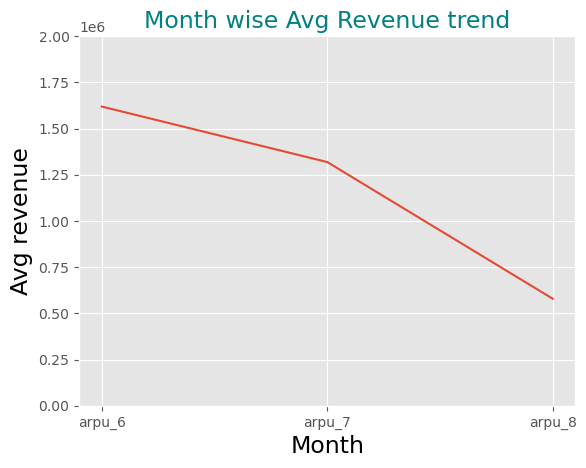

In [ ]:
#plotting month vs avg revenue
plt.plot(list_x, list_y)
plt.ylim(0,2000000)
plt.style.use('ggplot')
plt.title("Month wise Avg Revenue trend",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Avg revenue",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Average revenu per user(arpu) is dropping from good phase to action phaseas seen in the graph.

In [ ]:
#checking for range of values
df[["onnet_mou_6", "onnet_mou_7", "onnet_mou_8"]].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,30001.000000,30001.000000,30001.000000
mean,261.416302,268.397982,235.378852
std,459.313442,479.690135,457.844464
min,0.000000,0.000000,0.000000
25%,20.010000,18.930000,15.630000
50%,84.580000,82.810000,65.610000
75%,290.440000,290.240000,239.960000
max,7376.710000,8157.780000,10752.560000


In [ ]:
list_y_onnet = [df[df["churn"] == 1]["onnet_mou_6"].sum(), df[df["churn"] == 1]["onnet_mou_7"].sum(), df[df["churn"] == 1]["onnet_mou_8"].sum()]
print(list_y_onnet)
list_x_onnet = ["onnet_mou_6", "onnet_mou_7", "onnet_mou_8"]
print(list_x_onnet)

[906086.12, 720687.4099999999, 302048.20999999996]
['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']


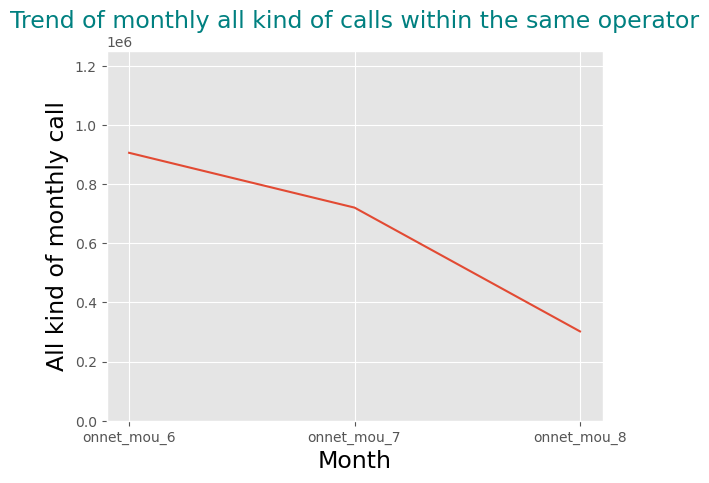

In [ ]:
#plotting monthly calls with respect to the month within same operator
plt.plot(list_x_onnet, list_y_onnet)
plt.ylim(0,1250000)
plt.style.use('ggplot')
plt.title("Trend of monthly all kind of calls within the same operator",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("All kind of monthly call",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Monthly all kind of calls within the same operator(onnet) is dropping from good phase to action phase as seen in the graph.

In [ ]:
#Lets see how the values are varying with respect to churn
list_y_offnet = [df[df["churn"] == 1]["offnet_mou_6"].sum(), df[df["churn"] == 1]["offnet_mou_7"].sum(), df[df["churn"] == 1]["offnet_mou_8"].sum()]
print(list_y_offnet)
list_x_offnet = ["offnet_mou_6", "offnet_mou_7", "offnet_mou_8"]
print(list_x_offnet)

[1165158.27, 950668.0, 410532.22000000003]
['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']


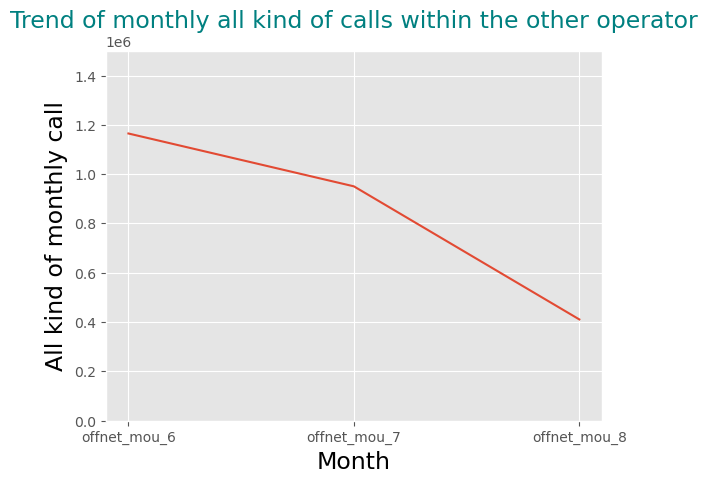

In [ ]:
#plotting monthly calls with respect to the month with other operator
plt.plot(list_x_offnet, list_y_offnet)
plt.ylim(0,1500000)
plt.style.use('ggplot')
plt.title("Trend of monthly all kind of calls within the other operator",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("All kind of monthly call",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Monthly all kind of calls with other operator(offnet) is dropping from good phase to action phase as seen in the graph

In [ ]:
#checking the non-churn values
per_roam_ic_mou_6 = df[df["roam_ic_mou_6"] == 0]["churn"].sum()/df.shape[0] * 100
per_roam_ic_mou_7 = df[df["roam_ic_mou_7"] == 0]["churn"].sum()/df.shape[0] * 100
per_roam_ic_mou_8 = df[df["roam_ic_mou_8"] == 0]["churn"].sum()/df.shape[0] * 100
roam_ic_mou_df = pd.DataFrame()
roam_ic_mou_df["month_6"] = np.array([per_roam_ic_mou_6])
roam_ic_mou_df["month_7"] = np.array([per_roam_ic_mou_7])
roam_ic_mou_df["month_8"] = np.array([per_roam_ic_mou_8])
roam_ic_mou_df

,month_6,month_7,month_8
0,6.066464,5.439819,4.889837


In [ ]:
# lets verify the null values present
df[["roam_og_mou_6", "roam_og_mou_7", "roam_og_mou_8"]].isnull().sum()/df.shape[0]*100

roam_og_mou_6    0.0
roam_og_mou_7    0.0
roam_og_mou_8    0.0
dtype: float64

In [ ]:
#checking the the non-churn values
per_roam_og_mou_6 = df[df["roam_og_mou_6"] == 0]["churn"].sum()/df.shape[0] * 100
per_roam_og_mou_7 = df[df["roam_og_mou_7"] == 0]["churn"].sum()/df.shape[0] * 100
per_roam_og_mou_8 = df[df["roam_og_mou_8"] == 0]["churn"].sum()/df.shape[0] * 100
roam_og_mou_df = pd.DataFrame()
roam_og_mou_df["month_6"] = np.array([per_roam_og_mou_6])
roam_og_mou_df["month_7"] = np.array([per_roam_og_mou_7])
roam_og_mou_df["month_8"] = np.array([per_roam_og_mou_8])
roam_og_mou_df

,month_6,month_7,month_8
0,6.013133,5.303157,4.876504


**Observation**

Roaming incoming and roaming outgoing is not so significat, the drop is very slight.

In [ ]:
#checking the sum of recharges done by non-churns
list_y_last_day_rch_amt = [df[df["last_day_rch_amt_6"] == 0]["churn"].sum(),
                           df[df["last_day_rch_amt_7"] == 0]["churn"].sum(),
                           df[df["last_day_rch_amt_8"] == 0]["churn"].sum()]
print(list_y_last_day_rch_amt)
list_x_last_day_rch_amt = ["last_day_rch_amt_6", "last_day_rch_amt_7", "last_day_rch_amt_8"]
print(list_x_last_day_rch_amt)

[385, 797, 1769]
['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']


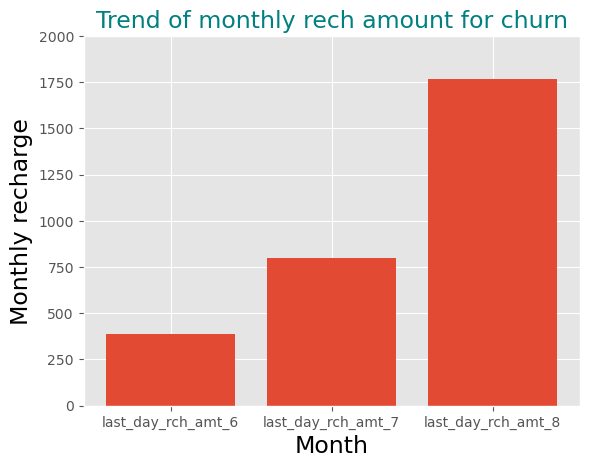

In [ ]:
#plotting sum of rechage withrespect to the months
plt.bar(list_x_last_day_rch_amt, list_y_last_day_rch_amt)
plt.ylim(0,2000)
plt.style.use('ggplot')
plt.title("Trend of monthly rech amount for churn",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Monthly recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

Observation

The last_day_rch_amt is not signification

[1932487.06, 1531747.56, 511051.1]
['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


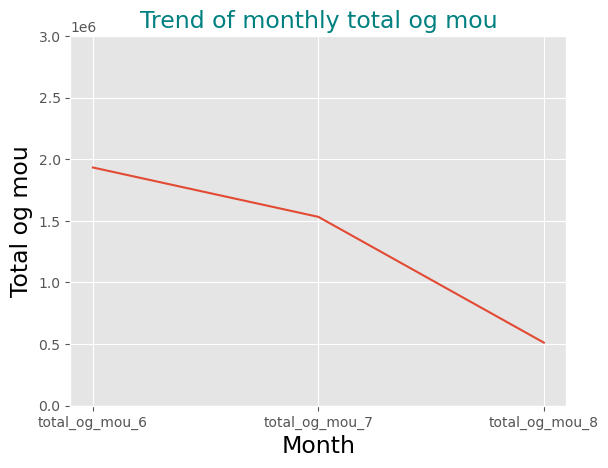

In [ ]:
#plotting total outgoing MOU with months
list_y_og_mou = [df[df["churn"] == 1]["total_og_mou_6"].sum(), df[df["churn"] == 1]["total_og_mou_7"].sum(), df[df["churn"] == 1]["total_og_mou_8"].sum()]
print(list_y_og_mou)
list_x_og_mou = ["total_og_mou_6", "total_og_mou_7", "total_og_mou_8"]
print(list_x_og_mou)
plt.plot(list_x_og_mou, list_y_og_mou)
plt.ylim(0,3000000)
plt.style.use('ggplot')
plt.title("Trend of monthly total og mou",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Total og mou",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Monthly total outgoing minutes of usuage(total_og_mou) is dropping from good phase to action phase as seen in the graph

[564972.73, 446477.29, 154867.64]
['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


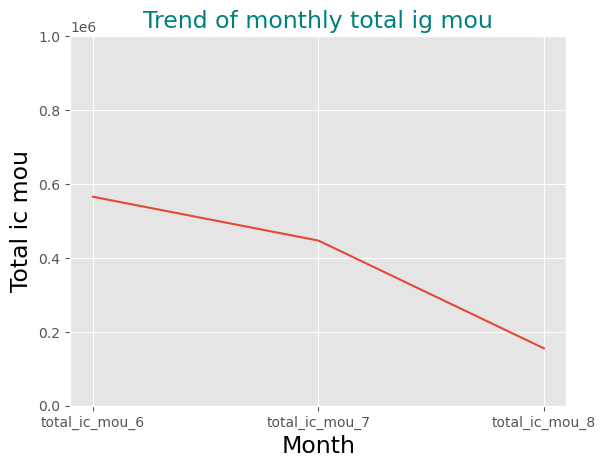

In [ ]:
#plotting total incoming MOU with months
list_y_ig_mou = [df[df["churn"] == 1]["total_ic_mou_6"].sum(),
                 df[df["churn"] == 1]["total_ic_mou_7"].sum(),
                 df[df["churn"] == 1]["total_ic_mou_8"].sum()]
print(list_y_ig_mou)
list_x_ig_mou = ["total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8"]
print(list_x_ig_mou)
plt.plot(list_x_ig_mou, list_y_ig_mou)
plt.ylim(0,1000000)
plt.style.use('ggplot')
plt.title("Trend of monthly total ig mou",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Total ic mou",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Monthly total incoming minutes of usuage(total_ic_mou) is dropping from good phase to action phase as seen in the graph

[33924, 27816, 12789]
['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']


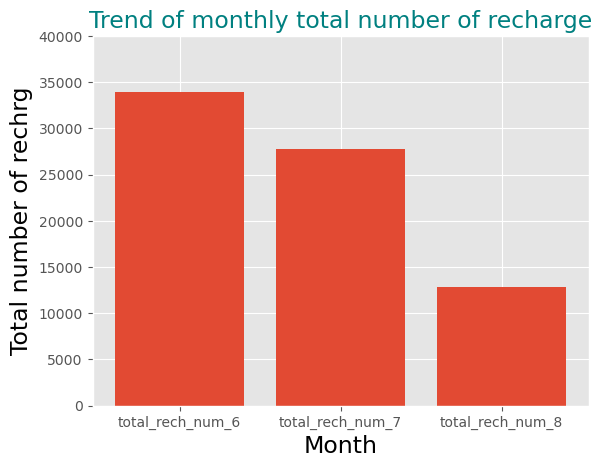

In [ ]:
#plotting total number of recharges with month
list_y_num_rech = [df[df["churn"] == 1]["total_rech_num_6"].sum(),
                 df[df["churn"] == 1]["total_rech_num_7"].sum(),
                 df[df["churn"] == 1]["total_rech_num_8"].sum()]
print(list_y_num_rech)
list_x_num_rech = ["total_rech_num_6", "total_rech_num_7", "total_rech_num_8"]
print(list_x_num_rech)
plt.bar(list_x_num_rech, list_y_num_rech)
plt.ylim(0,40000)
plt.style.use('ggplot')
plt.title("Trend of monthly total number of recharge",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Total number of rechrg",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

Trend of monthly total number of recharge is also dropping from good phase to action phase as seen in the graph

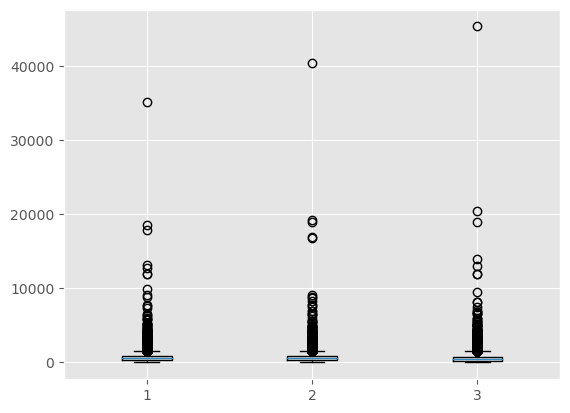

In [ ]:
#CHecking for outliers for the total recharge
plt.boxplot(df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']])
plt.show()

In [ ]:
#dropping the outliers
df = df[df["total_rech_amt_6"] < df["total_rech_amt_6"].quantile(0.99)]
df = df[df["total_rech_amt_7"] < df["total_rech_amt_7"].quantile(0.99)]
df = df[df["total_rech_amt_8"] < df["total_rech_amt_8"].quantile(0.99)]
df.shape

(29105, 158)

**Observation**

Considering the outliers, we will be considering the 0.99 percentlie of values for the analysis and also they seem to be continous

[1680837, 1324103, 519449]
['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


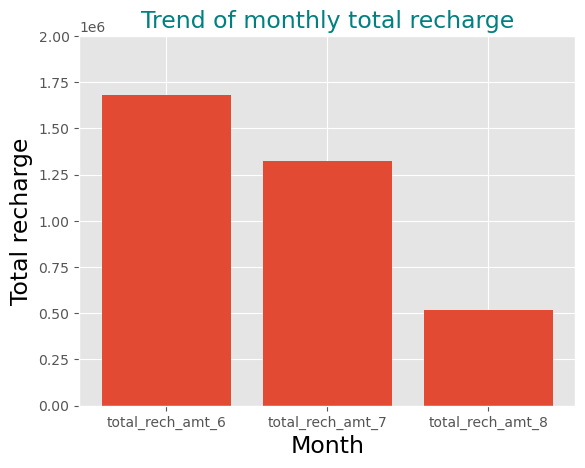

In [ ]:
#plotting total recharges done with respect to month
list_y_amt_rech = [df[df["churn"] == 1]["total_rech_amt_6"].sum(),
                 df[df["churn"] == 1]["total_rech_amt_7"].sum(),
                 df[df["churn"] == 1]["total_rech_amt_8"].sum()]
print(list_y_amt_rech)
list_x_amt_rech = ["total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8"]
print(list_x_amt_rech)
plt.bar(list_x_amt_rech, list_y_amt_rech)
plt.ylim(0,2000000)
plt.style.use('ggplot')
plt.title("Trend of monthly total recharge",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Total recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

Observation

Trend of monthly total recharge is also dropping from good phase to action phase as seen in the graph

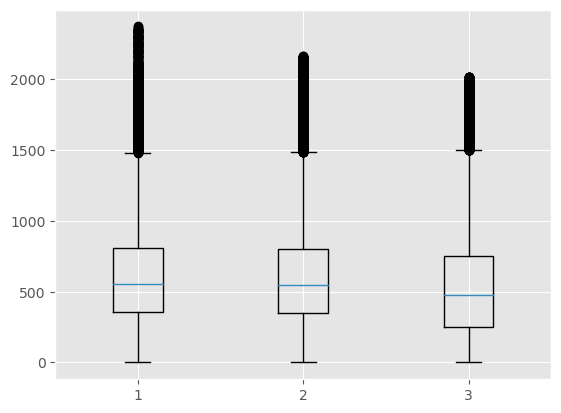

In [ ]:
#plotting to see the variation of total recharges with respect to the month
plt.boxplot(df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']])
plt.show()

**Observation**

After dropping the outliers, the values seems to be continous

In [ ]:
#dropping the "max_rech_amt" column
df = df.drop(columns=["max_rech_amt_6", "max_rech_amt_7", "max_rech_amt_8"], axis = 1)

**Observation**

The Max reachrge does not providing significance

In [ ]:
#checking for churns with respect to 2G data recharge
df[df["churn"] == 1][["count_rech_2g_6","count_rech_2g_7", "count_rech_2g_8"]].sum()

count_rech_2g_6    2729.0
count_rech_2g_7    2295.0
count_rech_2g_8     703.0
dtype: float64

In [ ]:
#checking for churns with respect to 3G data recharge
df[df["churn"] == 0][["count_rech_2g_6","count_rech_2g_7", "count_rech_2g_8"]].sum()

count_rech_2g_6    34135.0
count_rech_2g_7    39107.0
count_rech_2g_8    35001.0
dtype: float64

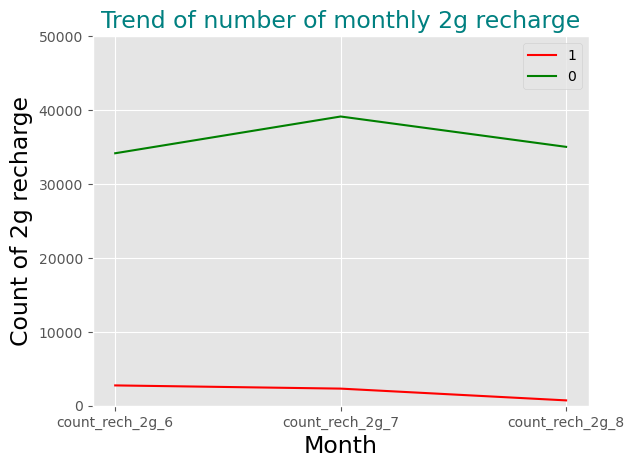

In [ ]:
#plotting the trend of 2G recharges with repect to month done by churn and non-churns
list_y_rech_2g_1 = [df[df["churn"] == 1]["count_rech_2g_6"].sum(),
                 df[df["churn"] == 1]["count_rech_2g_7"].sum(),
                 df[df["churn"] == 1]["count_rech_2g_8"].sum()]
list_x_rech_2g_1 = ["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8"]
plt.plot(list_x_rech_2g_1, list_y_rech_2g_1,color = "red")
list_y_rech_2g_0 = [df[df["churn"] == 0]["count_rech_2g_6"].sum(),
                 df[df["churn"] == 0]["count_rech_2g_7"].sum(),
                 df[df["churn"] == 0]["count_rech_2g_8"].sum()]
list_x_rech_2g_0 = ["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8"]
plt.plot(list_x_rech_2g_0, list_y_rech_2g_0,color = "green")
plt.legend("10")
plt.ylim(0,50000)
plt.style.use('ggplot')

plt.title("Trend of number of monthly 2g recharge",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of 2g recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

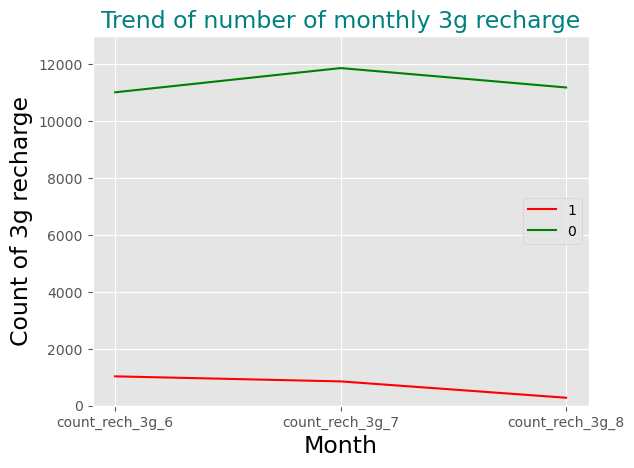

In [ ]:
#plotting the trend of 3G recharges with repect to month done by churn and non-churns
list_y_rech_3g_1 = [df[df["churn"] == 1]["count_rech_3g_6"].sum(),
                 df[df["churn"] == 1]["count_rech_3g_7"].sum(),
                 df[df["churn"] == 1]["count_rech_3g_8"].sum()]
list_x_rech_3g_1 = ["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8"]
plt.plot(list_x_rech_3g_1, list_y_rech_3g_1,color = "red")
list_y_rech_3g_0 = [df[df["churn"] == 0]["count_rech_3g_6"].sum(),
                 df[df["churn"] == 0]["count_rech_3g_7"].sum(),
                 df[df["churn"] == 0]["count_rech_3g_8"].sum()]
list_x_rech_3g_0 = ["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8"]
plt.plot(list_x_rech_3g_0, list_y_rech_3g_0,color = "green")
plt.legend("10")
plt.ylim(0,13000)
plt.style.use('ggplot')

plt.title("Trend of number of monthly 3g recharge",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of 3g recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 2G and 3G total number of data recharge is dropping significantly from the churns.

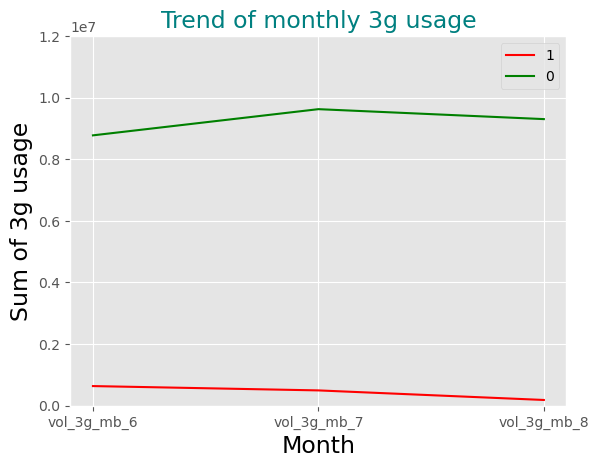

In [ ]:
#plotting the trend of 3G data usage with repect to month done by churn and non-churns
list_y_vol_3g_1 = [df[df["churn"] == 1]["vol_3g_mb_6"].sum(),
                 df[df["churn"] == 1]["vol_3g_mb_7"].sum(),
                 df[df["churn"] == 1]["vol_3g_mb_8"].sum()]
list_x_vol_3g_1 = ["vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8"]
plt.plot(list_x_vol_3g_1, list_y_vol_3g_1,color = "red")
list_y_vol_3g_0 = [df[df["churn"] == 0]["vol_3g_mb_6"].sum(),
                 df[df["churn"] == 0]["vol_3g_mb_7"].sum(),
                 df[df["churn"] == 0]["vol_3g_mb_8"].sum()]
list_x_vol_3g_0 = ["vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8"]
plt.plot(list_x_vol_3g_0,list_y_vol_3g_0,color = "green")
plt.legend("10")
plt.ylim(0,12000000)
plt.style.use('ggplot')

plt.title("Trend of monthly 3g usage",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Sum of 3g usage",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 3G data usuage is dropping significantly from the churns.

In [ ]:
#lets drop the columns that are not significant
df = df.drop(columns=["arpu_3g_6", "arpu_3g_7", "arpu_3g_8",
                      "arpu_2g_6", "arpu_2g_7", "arpu_2g_8"], axis = 1)

In [ ]:
#Checking the count of 2G data recharges done
df[["monthly_2g_6", "monthly_2g_7", "monthly_2g_8"]].sum()

monthly_2g_6    5161
monthly_2g_7    5409
monthly_2g_8    4540
dtype: int64

In [ ]:
#Checking the count of 2G data recharges done by the non-churns
df[df["churn"] == 1][["monthly_2g_6", "monthly_2g_7", "monthly_2g_8"]].sum()

monthly_2g_6    225
monthly_2g_7    167
monthly_2g_8     54
dtype: int64

In [ ]:
#Checking the count of 2G data recharges done by the non-churns
df[df["churn"] == 0][["monthly_2g_6", "monthly_2g_7", "monthly_2g_8"]].sum()

monthly_2g_6    4936
monthly_2g_7    5242
monthly_2g_8    4486
dtype: int64

[225, 167, 54]
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']


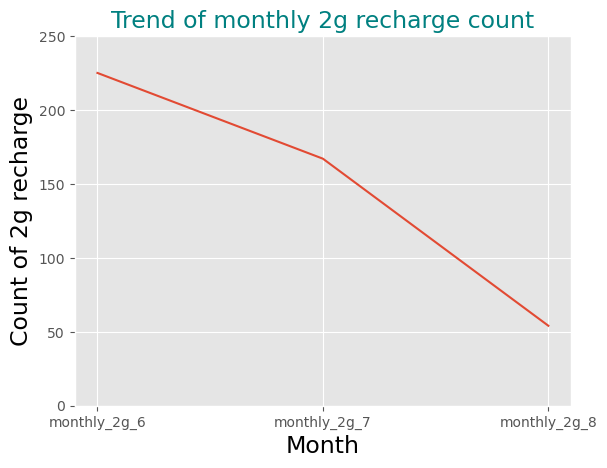

In [ ]:
#plotting count of 2G recharges done monthly by the churns
list_y_monthy_2g = [df[df["churn"] == 1]["monthly_2g_6"].sum(),
                 df[df["churn"] == 1]["monthly_2g_7"].sum(),
                 df[df["churn"] == 1]["monthly_2g_8"].sum()]
print(list_y_monthy_2g)
list_x_monthy_2g = ["monthly_2g_6", "monthly_2g_7", "monthly_2g_8"]
print(list_x_monthy_2g)
plt.plot(list_x_monthy_2g, list_y_monthy_2g)
plt.ylim(0,250)
plt.style.use('ggplot')
plt.title("Trend of monthly 2g recharge count",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of 2g recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 2G data usuage is dropping significantly from the churns as seen in the graph.

[442, 328, 128]
['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']


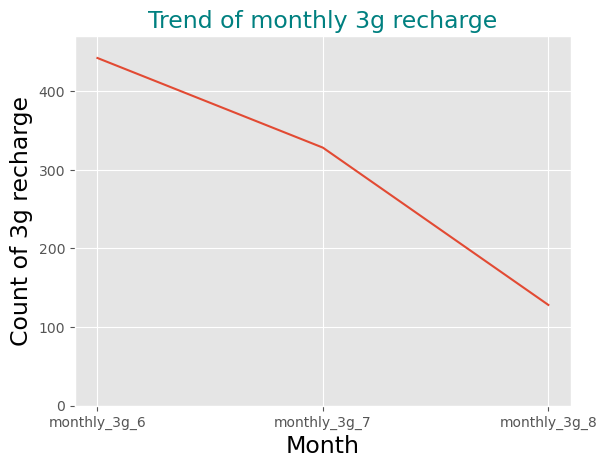

In [ ]:
#plotting count of 3G recharges done monthly by the churns
list_y_monthy_3g = [df[df["churn"] == 1]["monthly_3g_6"].sum(),
                 df[df["churn"] == 1]["monthly_3g_7"].sum(),
                 df[df["churn"] == 1]["monthly_3g_8"].sum()]
print(list_y_monthy_3g)
list_x_monthy_3g = ["monthly_3g_6", "monthly_3g_7", "monthly_3g_8"]
print(list_x_monthy_3g)
plt.plot(list_x_monthy_3g, list_y_monthy_3g)
plt.ylim(0,470)
plt.style.use('ggplot')
plt.title("Trend of monthly 3g recharge",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of 3g recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 3G recharge is dropping significantly from the churns as seen in the graph.

[2504, 2128, 649]
['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


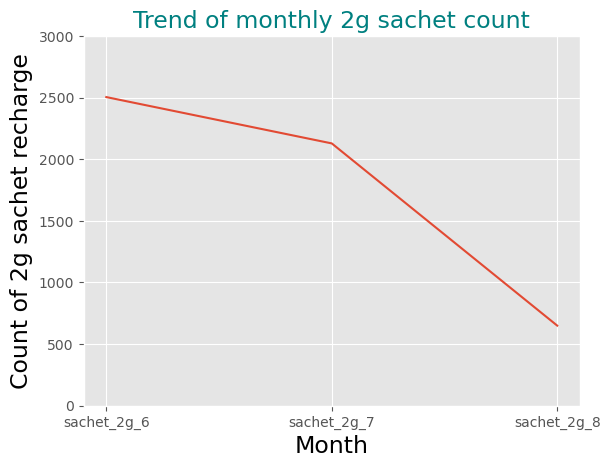

In [ ]:
#plotting count of 2G sachet recharges done monthly by the churns
list_y_sachet_2g = [df[df["churn"] == 1]["sachet_2g_6"].sum(),
                 df[df["churn"] == 1]["sachet_2g_7"].sum(),
                 df[df["churn"] == 1]["sachet_2g_8"].sum()]
print(list_y_sachet_2g)
list_x_sachet_2g = ["sachet_2g_6", "sachet_2g_7", "sachet_2g_8"]
print(list_x_sachet_2g)
plt.plot(list_x_sachet_2g, list_y_sachet_2g)
plt.ylim(0,3000)
plt.style.use('ggplot')
plt.title("Trend of monthly 2g sachet count",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of 2g sachet recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 2G sachet recharge is dropping significantly from the churns as seen in the graph.

[586, 523, 148]
['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


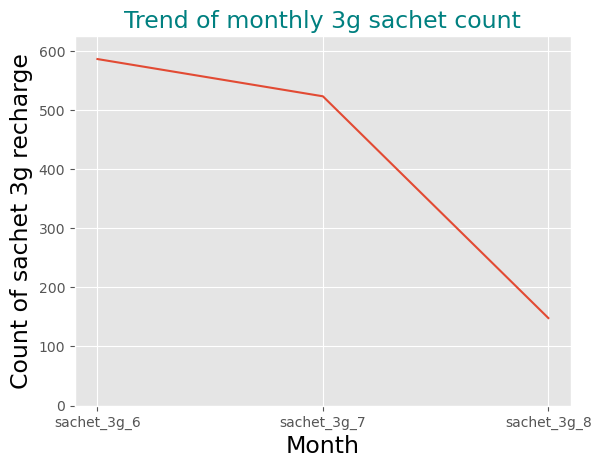

In [ ]:
#plotting count of 3G sachet recharges done monthly by the churns
list_y_sachet_3g = [df[df["churn"] == 1]["sachet_3g_6"].sum(),
                 df[df["churn"] == 1]["sachet_3g_7"].sum(),
                 df[df["churn"] == 1]["sachet_3g_8"].sum()]
print(list_y_sachet_3g)
list_x_sachet_3g = ["sachet_3g_6", "sachet_3g_7", "sachet_3g_8"]
print(list_x_sachet_3g)
plt.plot(list_x_sachet_3g, list_y_sachet_3g)
plt.ylim(0,625)
plt.style.use('ggplot')
plt.title("Trend of monthly 3g sachet count",fontdict={"fontsize":17, "fontweight":5},color = "teal")
plt.xlabel("Month",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.ylabel("Count of sachet 3g recharge",fontdict={"fontsize":17, "fontweight":5},color = "black")
plt.show()

**Observation**

The trend of 3G sachet recharge is dropping significantly from the churns as seen in the graph.

In [ ]:
#checking the values in the post paid columns
df[["jul_vbc_3g","jun_vbc_3g", "sep_vbc_3g"]].head()

,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.00,101.20,3.58
8,910.65,122.16,0.00
21,0.00,0.00,0.00
23,51.86,0.00,0.00
38,0.00,0.00,0.00


In [ ]:
#Checking the variation and range in the data
df[["jul_vbc_3g","jun_vbc_3g", "sep_vbc_3g"]].describe()

,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,29105.000000,29105.000000,29105.000000
mean,171.421479,151.324806,7.547633
std,416.558083,387.719541,50.119951
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,131.000000,94.940000,0.000000
max,9165.600000,7581.250000,2618.570000


**Observation**

As seen, these columns doesnt signify anything with respect to the business objective. Therefore lets drop these columns

In [ ]:
#dropping the unnecessary columns
df = df.drop( columns = ["jul_vbc_3g","jun_vbc_3g", "sep_vbc_3g"], axis = 1)

In [ ]:
#checking the column "aon"(age on netowrk) with respect to churns
df[df["churn"]== 1]["aon"].describe()

count    2343.000000
mean      860.990184
std       745.078267
min       180.000000
25%       354.500000
50%       606.000000
75%      1043.000000
max      3670.000000
Name: aon, dtype: float64

<Axes: xlabel='aon', ylabel='Count'>

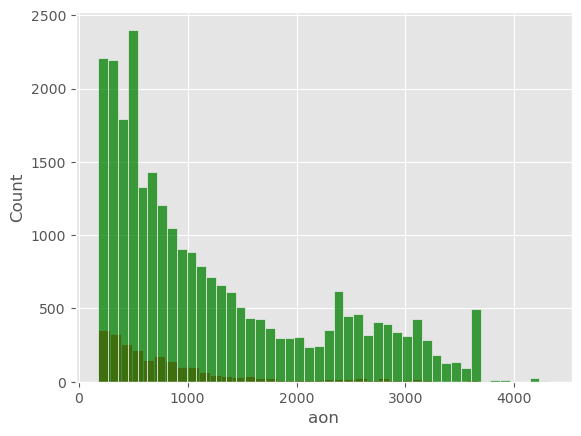

In [ ]:
#Plotting "aon" between churns and non-churns
sns.histplot(df[df["churn"]== 1]["aon"],color="red")
sns.histplot(df[df["churn"]== 0]["aon"],color="green")
# No singnificance of

**Observation**

As seen in the above histagrom, the people who fall within 1500 days are more likely to be churn (This can be observed in the bottom darked portion of the graph)

In [ ]:
#checking the correlation between the variables
corr_df = df.corr()

In [ ]:
round(corr_df,2)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,churn,arpu_diff,total_og_mou_diff,onnet_mou_diff,offnet_mou_diff,total_ic_mou_diff,total_rech_amt_diff
arpu_6,1.00,0.53,0.44,0.43,0.26,0.22,0.59,0.37,0.31,0.11,0.07,0.08,0.19,0.12,0.12,0.21,0.16,0.14,0.41,0.30,0.27,0.17,0.13,0.12,0.07,0.01,0.02,0.41,0.30,0.27,0.35,0.20,0.16,0.38,0.22,0.18,0.07,0.05,0.05,NaN,NaN,NaN,0.50,0.28,0.22,0.13,0.07,0.06,0.14,0.05,0.06,0.07,0.01,-0.00,0.67,0.42,0.34,0.10,0.08,0.07,0.23,0.18,0.15,0.07,0.06,0.05,0.22,0.17,0.15,0.10,0.07,0.06,0.12,0.08,0.06,0.03,0.03,0.02,NaN,NaN,NaN,0.14,0.10,0.08,0.26,0.19,0.16,0.05,-0.04,-0.02,0.04,0.02,0.03,0.02,0.01,0.01,0.40,0.13,0.11,0.93,0.50,0.43,0.20,0.12,0.15,-0.18,-0.21,-0.27,-0.21,0.07,-0.03,0.00,-0.05,-0.08,-0.13,-0.10,0.10,0.00,0.01,0.01,-0.01,-0.00,-0.03,-0.10,-0.07,-0.20,-0.25,-0.20,0.15,0.03,0.06,-0.01,-0.05,-0.03,-0.17,-0.27,-0.20,0.07,0.01,0.08,-0.36,-0.31,-0.22,-0.27,-0.11,-0.31
arpu_7,0.53,1.00,0.65,0.28,0.43,0.35,0.38,0.58,0.46,0.09,0.09,0.09,0.12,0.16,0.15,0.14,0.21,0.18,0.27,0.39,0.32,0.13,0.17,0.14,0.01,0.06,0.05,0.27,0.39,0.33,0.22,0.36,0.29,0.24,0.39,0.31,0.05,0.08,0.06,NaN,NaN,NaN,0.31,0.50,0.40,0.05,0.12,0.05,0.05,0.12,0.09,0.02,0.02,0.01,0.43,0.67,0.53,0.06,0.10,0.09,0.15,0.22,0.18,0.05,0.07,0.06,0.14,0.21,0.18,0.08,0.11,0.11,0.08,0.12,0.10,0.03,0.04,0.03,NaN,NaN,NaN,0.10,0.15,0.13,0.17,0.25,0.22,0.02,-0.02,-0.01,0.02,0.04,0.03,0.01,0.02,0.01,0.17,0.36,0.25,0.53,0.92,0.63,0.16,0.22,0.21,-0.14,-0.26,-0.21,-0.19,-0.02,0.08,0.04,-0.01,-0.13,-0.07,-0.07,-0.00,0.11,0.06,-0.01,0.01,0.01,-0.10,-0.03,-0.05,-0.25,-0.20,-0.18,0.04,0.16,0.09,-0.04,0.01,-0.01,-0.27,-0.17,-0.15,0.06,0.04,-0.03,-0.10,-0.07,-0.04,-0.08,0.00,-0.08
arpu_8,0.44,0.65,1.00,0.19,0.30,0.45,0.28,0.41,0.61,0.09,0.06,0.10,0.12,0.10,0.18,0.13,0.17,0.24,0.26,0.34,0.46,0.15,0.17,0.21,0.00,0.03,0.08,0.26,0.34,0.45,0.13,0.23,0.37,0.13,0.24,0.39,0.05,0.06,0.09,NaN,NaN,NaN,0.17,0.32,0.50,0.05,0.07,0.11,0.03,0.06,0.14,0.01,0.01,0.00,0.30,0.47,0.69,0.07,0.10,0.14,0.15,0.20,0.26,0.07,0.08,0.11,0.15,0.20

In [ ]:
#plotting the heatmap to detect highly co-related values
plt.figure(figsize=(100,100))
sns.heatmap(corr_df, cmap="Greens", annot=True)
plt.show()

<Figure size 10000x10000 with 0 Axes>

In [ ]:
#plotting to check highly co-related values again
plt.figure(figsize=(100,100))
sns.heatmap(corr_df, cmap="Greens", annot=True)
plt.show()

<Figure size 10000x10000 with 0 Axes>

In [ ]:
print(corr_df)

                       arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6               1.000000  0.533474  0.441031     0.434813     0.263980   
arpu_7               0.533474  1.000000  0.647717     0.278895     0.432273   
arpu_8               0.441031  0.647717  1.000000     0.189358     0.297808   
onnet_mou_6          0.434813  0.278895  0.189358     1.000000     0.747459   
onnet_mou_7          0.263980  0.432273  0.297808     0.747459     1.000000   
onnet_mou_8          0.221686  0.353461  0.449508     0.617201     0.809357   
offnet_mou_6         0.588771  0.377122  0.275087     0.069822     0.028473   
offnet_mou_7         0.365284  0.576115  0.410212     0.024977     0.065078   
offnet_mou_8         0.314775  0.460439  0.610950     0.026391     0.062641   
roam_ic_mou_6        0.113697  0.090690  0.087307     0.014814     0.028361   
roam_ic_mou_7        0.066935  0.090373  0.061070     0.020725     0.001914   
roam_ic_mou_8        0.079010  0.089974  0.096624   

In [ ]:
# dropping highly corelatted values
drop_list_heatmap_2 = ["arpu_diff", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8","total_rech_data_8",
                      "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8",
                       "total_rech_amt_6" , "total_rech_amt_7", "total_rech_amt_8",
                       "total_ic_mou_6" , "total_ic_mou_7", "total_ic_mou_8",
                       "std_ic_mou_6", "std_ic_mou_7", "std_ic_mou_8",
                       "loc_ic_mou_6", "loc_ic_mou_7", "loc_ic_mou_8",
                       "total_og_mou_6", "total_og_mou_7", "total_og_mou_8",
                       "onnet_mou_6", "onnet_mou_7", "onnet_mou_8",
                       "offnet_mou_6", "offnet_mou_7", "offnet_mou_8"]

In [ ]:
df = df.drop(columns= drop_list_heatmap_2, axis=1)
plt.figure(figsize=(100,100))
corr_df = df.corr()
sns.heatmap(corr_df, cmap="Greens", annot=True)
plt.show()

<Figure size 10000x10000 with 0 Axes>

In [ ]:
#verifying the corelation in the dtatset
drop_list_heatmap_3 = ["total_og_mou_diff", "loc_og_mou_6" ,"loc_og_mou_7", "loc_og_mou_8",
                      "std_og_mou_6", "std_og_mou_7", "std_og_mou_8",
                      "loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8",
                      "loc_og_t2m_mou_6", "loc_og_t2m_mou_7", "loc_og_t2m_mou_8"]
df = df.drop(columns= drop_list_heatmap_3, axis=1)
plt.figure(figsize=(100,100))
corr_df = df.corr()
# sns.heatmap(corr_df, cmap="Greens", annot=True)
plt.show()

<Figure size 10000x10000 with 0 Axes>

**Observation**

As seen in the heatmap, the highly correlated attributes are to be dropped

In [ ]:
df.shape

(29105, 104)

# Step 3: Class Imbalancing and Scaling

In [ ]:
#checking the proportion of churns in the dataset
df["churn"].value_counts().values

array([26762,  2343], dtype=int64)

**Observation**

Therefore we have 26762 non-churns and 2343 churns

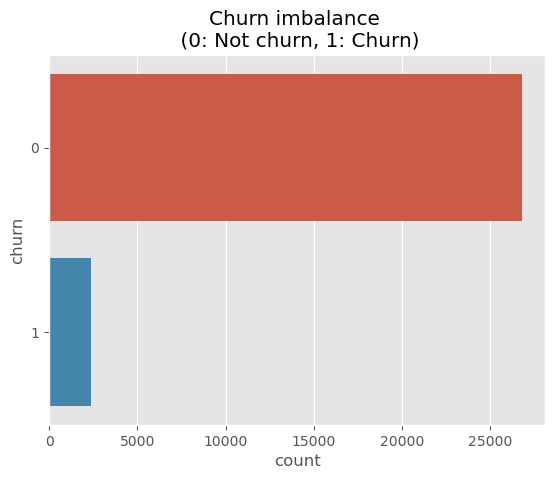

In [ ]:
#plotting the proportion of churns in the dataset
sns.countplot(data=df, y="churn")
plt.title("Churn imbalance \n (0: Not churn, 1: Churn)")
plt.show()

In [ ]:
# spliting the train-test
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = df.churn
X = df.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [ ]:
#checking the shape of train and test data
X_train.shape, X_test.shape

((20373, 103), (8732, 103))

In [ ]:
#checking the shape of train and test data
y_train.shape, y_test.shape

((20373,), (8732,))

In [ ]:
#checking the count of values in the y train data
y_train.value_counts()

0    18733
1     1640
Name: churn, dtype: int64

In [ ]:
#checking the count of values in the y test data
y_test.value_counts()

0    8029
1     703
Name: churn, dtype: int64

In [ ]:
#importing the required library for class imbalance
from collections import Counter

In [ ]:
print(sorted(Counter(y_train).items()))

[(0, 18733), (1, 1640)]


In [ ]:
#running smote to counter the problem of class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

37466

In [ ]:
#checking the shape of train and test data after imbalance
X_resampled_smt.shape, X_test.shape

((37466, 103), (8732, 103))

In [ ]:
#copying the dataset to perform decision tree and random forest
y_resampled_smt_dt = y_resampled_smt.copy()
y_resampled_smt_rf = y_resampled_smt.copy()

In [ ]:
#checking the shape of train and test data after imbalance
y_resampled_smt.shape, y_test.shape

((37466,), (8732,))

In [ ]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 18733), (1, 18733)]


In [ ]:
col = X_resampled_smt.columns

In [ ]:
len(col)

103

In [ ]:
X_resampled_smt.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,onnet_mou_diff,offnet_mou_diff,total_ic_mou_diff,total_rech_amt_diff
0,685.617,291.467,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,729.19,230.93,3.31,0.00,0.0,0.0,0.0,0.0,0.0,1.78,0.0,0.0,1.43,0.00,0.00,1.55,0.0,0.0,8.61,3.38,16.03,65.93,41.29,58.24,1.34,0.00,0.93,0.00,0.00,0.00,7.48,2.66,2.03,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15,8,6,0,98,0,0.0,23.36,0.02,0.00,379.67,71.96,0.00,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1.0,1.0,0.0,1264,0.00,-5.970,-457.445,-65.360,-599.0
1,363.998,327.181,221.391,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.15,0.00,0.0,0.0,0.0,3.96,0.40,0.00,18.69,6.45,2.80,3.78,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6.44,0.81,0.00,1.53,0.0,0.0,7.08,3.73,5.06,159.18,150.36,227.93,115.28,21.66,116.29,10.73,0.00,0.00,5.38,4.33,1.51,14.18,2.73,6.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,12,14,16,30,30,5,90.0,103.49,100.84,143.32,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,2,2,10,0,0,0,0,0,0,1.0,1.0,1.0,1285,0.00,-11.200,-154.030,110.095,-145.5
2,42.266,83.430,137.077,1.99,0.0,0.0,1.56,0.0,0.0,0.66,0.11,0.64,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.84,11.89,2.49,35.48,106.66,157.16,160.81,120.01,62.86,0.00,3.46,0.00,0.00,0.00,0.71,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6,7,4,25,46,50,0.0,67.31,8.58,0.00,889.00,222.29,0.00,0.0,0.0,0.0,0,0,0,2,5,0,0,0,0,0,0,0,1.0,1.0,0.0,1220,0.00,0.940,14.730,-1.350,-10.5
3,459.671,567.184,749.900,35.61,0.0,0.0,53.28,0.0,0.0,1.56,10.04,5.78,0.0,0.0,0.0,121.48,376.93,468.18,1.36,58.63,51.13,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,11.01,15.11,12.76,82.76,335.41,225.36,20.38,54.51,31.93,0.60,0.00,0.28,1.60,7.54,23.94,1.80,0.00,4.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.53,0.0,0.0,0.0,12,13,17,30,110,152,518.0,559.04,40.50,40.34,423.51,902.28,448.13,0.0,0.0,0.0,1,1,0,0,0,4,0,0,1,0,0,1,1.0,1.0,1.0,2356,341.25,227.270,28.665,34.835,186.5
4,330.590,365.189,489.832,0.00,0.0,0.0,1.28,0.0,0.0,4.24,2.26,1.99,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.30,1.21,0.00,0.0,0.0,62.83,67.56,82.43,197.18,134.81,151.46,3.64,0.65,10.28,0.00,0.00,0.00,0.00,2.91,0.00,0.00,0.00,8.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5,8,9,128,0,0,309.0,141.98,23.67,23.93,293.60,329.05,733.00,0.0,0.0,0.0,1,0,0,0,1,0,0,0,2,0,1,0,1.0,1.0,1.0,1838,285.18,55.065,35.480,18.230,204.5


In [ ]:
y_resampled_smt.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
#scaling the attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_smt[col] = scaler.fit_transform(X_resampled_smt[col])
X_test[col] = scaler.transform(X_test[col])

In [ ]:
X_resampled_smt.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,onnet_mou_diff,offnet_mou_diff,total_ic_mou_diff,total_rech_amt_diff
0,0.399017,-0.629932,-1.021690,-0.220669,-0.195227,-0.181808,-0.258275,-0.283648,-0.270522,-0.297165,-0.297649,-0.253228,-0.271139,-0.220419,-0.207439,-0.486018,-0.455329,-0.341620,1.129932,0.088582,-0.361547,-0.146087,-0.13254,-0.120501,0.0,0.0,0.0,0.050229,-0.108802,-0.072307,-0.316687,-0.376534,-0.279332,0.222351,-0.01495,-0.012509,-0.336239,-0.350473,-0.204538,-0.326276,-0.430193,-0.248732,-0.275924,-0.297108,-0.253536,-0.211006,-0.201443,-0.175807,-0.237563,-0.241159,-0.211264,-0.155876,-0.155353,-0.117239,0.0,0.0,0.0,-0.3567,-0.115436,-0.190759,-0.150872,-0.163179,-0.138147,-0.084501,-0.087482,-0.079542,0.281964,-0.354635,-0.165834,-0.798788,0.156119,-0.569358,-0.501858,-0.298234,-0.339628,-0.268959,0.134248,-0.277765,-0.325406,-0.124341,-0.10304,-0.093663,-0.306928,-0.307064,-0.276689,0.001198,0.010806,-0.327669,-0.311281,-0.296287,-0.259494,-0.202388,-0.171611,-0.148285,1.107899,1.185925,-0.685825,0.256420,-0.323682,0.304377,-0.887994,0.008923,-0.972677
1,-0.575211,-0.516344,-0.346721,-0.220669,-0.195227,-0.181808,-0.258275,-0.283648,-0.270522,-0.297165,-0.286822,-0.253228,-0.271139,-0.220419,-0.207439,-0.477202,-0.454361,-0.341620,-0.460858,-0.453927,-0.363322,0.264142,-0.13254,-0.120501,0.0,0.0,0.0,-0.097157,-0.108802,-0.072307,0.023416,-0.331714,-0.279332,0.216924,-0.01495,-0.012509,-0.347292,-0.347877,-0.294107,0.139209,0.178084,0.772649,2.809343,0.257498,3.436793,-0.060766,-0.201443,-0.175807,-0.261978,-0.223419,-0.218003,0.926092,0.066306,0.422462,0.0,0.0,0.0,-0.3567,-0.115436,-0.190759,-0.150872,-0.163179,-0.138147,-0.084501,-0.087482,-0.079542,-0.051641,0.350744,1.115833,-0.536044,-0.468284,-0.521558,0.118499,-0.037310,-0.003876,0.323620,-0.387773,-0.381991,-0.325406,-0.124341,-0.10304,-0.093663,-0.306928,-0.307064,-0.276689,0.420598,0.433405,4.722913,-0.311281,-0.296287,-0.259494,-0.202388,-0.171611,-0.148285,1.107899,1.185925,1.519636,0.280463,-0.323682,0.289348,-0.055675,0.803791,0.243777
2,-1.549781,-1.291595,-0.603775,-0.195143,-0.195227,-0.181808,-0.244857,-0.283648,-0.270522,-0.251715,-0.289709,-0.204993,-0.271139,-0.220419,-0.207439,-0.486018,-0.455329,-0.341620,-0.502705,-0.469515,-0.373068,-0.146087,-0.13254,-0.120501,0.0,0.0,0.0,-0.097157,-0.108802,-0.072307,-0.413762,-0.376534,-0.279332,-0.198226,-0.01495,-0.012509,-0.320129,-0.287341,-0.315090,-0.478277,-0.065628,0.346678,4.042204,2.775761,1.727584,-0.211006,-0.149713,-0.175807,-0.324525,-0.269416,-0.228372,-0.155876,-0.155353,-0.117239,0.0,0.0,0.0,-0.3567,-0.115436,

**Observations**

The data is scaled using the Standard Sclar, where as Mean is 0 and the  standard deviation is 1

In [ ]:
#copying the data to perform decision tree and random forest
X_resampled_smt_dt = X_resampled_smt.copy()
X_resampled_smt_rf = X_resampled_smt.copy()
y_resampled_smt_dt = y_resampled_smt.copy()
y_resampled_smt_rf = y_resampled_smt.copy()

In [ ]:
X_resampled_smt_dt.shape, y_resampled_smt_dt.shape

((37466, 103), (37466,))

# Step 4: Model Building using PCA

In [ ]:
df_pca.shape

(30001, 161)

In [ ]:
# spliting the train-test
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = df_pca.churn
X = df_pca.drop('churn', axis=1)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [ ]:
# importing SMOTE for data imbalancing
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resample_pca, y_resampled_pca = smt.fit_resample(X_train_pca, y_train_pca)
len(X_resample_pca)

38582

In [ ]:
y_resampled_pca.value_counts()

0    19291
1    19291
Name: churn, dtype: int64

In [ ]:
X_resample_pca.shape, y_resampled_pca.shape

((38582, 160), (38582,))

In [ ]:
col = X_resample_pca.columns

In [ ]:
# Standard scaling before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resample_pca[col] = scaler.fit_transform(X_resample_pca[col])
X_test_pca[col] = scaler.transform(X_test_pca[col])

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA
pca = PCA()
X_resample_pca[col] = pca.fit_transform(X_resample_pca[col])
X_test_pca[col] = pca.transform(X_test_pca[col])

In [ ]:
explained_variance = pca.explained_variance_ratio_ # gives Principle Components
explained_variance

array([9.43311008e-02, 9.19255426e-02, 5.83034725e-02, 5.08106941e-02,
       3.99006681e-02, 3.58580462e-02, 3.11113542e-02, 2.71279851e-02,
       2.33218719e-02, 2.24761370e-02, 2.16166632e-02, 2.03697893e-02,
       1.86866006e-02, 1.73419047e-02, 1.66953046e-02, 1.62828385e-02,
       1.60539638e-02, 1.51341835e-02, 1.48374463e-02, 1.35220607e-02,
       1.28602878e-02, 1.27006346e-02, 1.17052917e-02, 1.13428183e-02,
       1.08052312e-02, 1.04606271e-02, 1.02386513e-02, 1.01585135e-02,
       9.55707476e-03, 9.21147014e-03, 8.52647932e-03, 8.08342304e-03,
       7.95985519e-03, 7.47548172e-03, 6.84974294e-03, 6.81365623e-03,
       6.50527212e-03, 6.41552338e-03, 6.27671626e-03, 6.17802015e-03,
       6.04249318e-03, 5.86350304e-03, 5.63379246e-03, 5.56778915e-03,
       5.31403532e-03, 5.18523448e-03, 4.95442680e-03, 4.89295695e-03,
       4.75122221e-03, 4.29718921e-03, 4.16655551e-03, 4.06347993e-03,
       3.99267852e-03, 3.92618869e-03, 3.90758737e-03, 3.71320576e-03,
      

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

1.0000000000000002

In [ ]:
pca.get_covariance()

array([[ 5.16163629e-32, -8.53057416e-34, -5.06287557e-34, ...,
        -4.70483810e-19, -1.95659950e-19,  3.02991683e-19],
       [-8.53057416e-34,  2.26726372e-30,  8.36587881e-31, ...,
         1.44539332e-16,  1.83754233e-16, -2.67755500e-17],
       [-5.06287557e-34,  8.36587881e-31,  3.34095264e-30, ...,
         3.00840256e-16,  7.18898297e-17,  1.02398709e-17],
       ...,
       [-4.70483810e-19,  1.44539332e-16,  3.00840256e-16, ...,
         1.00002592e+00,  2.61065725e-01,  5.45059102e-01],
       [-1.95659950e-19,  1.83754233e-16,  7.18898297e-17, ...,
         2.61065725e-01,  1.00002592e+00,  3.28710170e-01],
       [ 3.02991683e-19, -2.67755500e-17,  1.02398709e-17, ...,
         5.45059102e-01,  3.28710170e-01,  1.00002592e+00]])

In [ ]:
pca.get_covariance().shape

(160, 160)

In [ ]:
explained_variance

array([9.43311008e-02, 9.19255426e-02, 5.83034725e-02, 5.08106941e-02,
       3.99006681e-02, 3.58580462e-02, 3.11113542e-02, 2.71279851e-02,
       2.33218719e-02, 2.24761370e-02, 2.16166632e-02, 2.03697893e-02,
       1.86866006e-02, 1.73419047e-02, 1.66953046e-02, 1.62828385e-02,
       1.60539638e-02, 1.51341835e-02, 1.48374463e-02, 1.35220607e-02,
       1.28602878e-02, 1.27006346e-02, 1.17052917e-02, 1.13428183e-02,
       1.08052312e-02, 1.04606271e-02, 1.02386513e-02, 1.01585135e-02,
       9.55707476e-03, 9.21147014e-03, 8.52647932e-03, 8.08342304e-03,
       7.95985519e-03, 7.47548172e-03, 6.84974294e-03, 6.81365623e-03,
       6.50527212e-03, 6.41552338e-03, 6.27671626e-03, 6.17802015e-03,
       6.04249318e-03, 5.86350304e-03, 5.63379246e-03, 5.56778915e-03,
       5.31403532e-03, 5.18523448e-03, 4.95442680e-03, 4.89295695e-03,
       4.75122221e-03, 4.29718921e-03, 4.16655551e-03, 4.06347993e-03,
       3.99267852e-03, 3.92618869e-03, 3.90758737e-03, 3.71320576e-03,
      

In [ ]:
components = len(explained_variance)
components

160

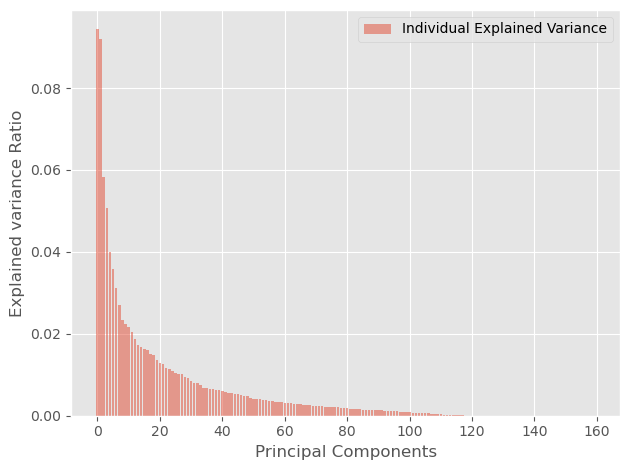

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.tight_layout()

**Observation**

Out of 160 components, as seen in the graph only ~100 components is explaining the variations in the data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,20)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n,n_jobs= -1)
    model.fit(X_resample_pca, y_resampled_pca)
    scores.append(model.score(X_test_pca, y_test_pca))
print(scores)
print(sum(scores)/len(scores))

In [ ]:
plt.figure(figsize=(5,4))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)
df_train_pca = pca_final.fit_transform(X_resample_pca)
df_train_pca.shape

(38582, 75)

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(75, 75)

In [ ]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True, cmap="Greens")
plt.show()

In [ ]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(9001, 75)

**Observation**

We have plotted 2, 1st one is based on 10 intervals with 20 iterations and the 2nd one is based on 20 intervals with 10 iterations. Based on 2 graphs, at 75 estimators there is no significance, therefore based on 1st we are considering estimators as 100.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
logistic_pca = LogisticRegression()
model_pca = logistic_pca.fit(df_train_pca, y_resampled_pca)

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_train = model_pca.predict_proba(df_train_pca)
y_pred_train = model_pca.predict(df_train_pca)
y_pred_test = model_pca.predict(df_test_pca)

In [ ]:
print("Train Data Set Result")
print("precision=", precision_score(y_resampled_pca,y_pred_train))
print("recall=", recall_score(y_resampled_pca,y_pred_train))
print("accuracy=", accuracy_score(y_resampled_pca,y_pred_train))
print("")
print("Test Data Set Result")
print("precision=", precision_score(y_test_pca,y_pred_test))
print("recall=", recall_score(y_test_pca,y_pred_test))
print("accuracy=", accuracy_score(y_test_pca,y_pred_test))

Train Data Set Result
precision= 0.8276643990929705
recall= 0.8703540511119174
accuracy= 0.844564822974444

Test Data Set Result
precision= 0.280188679245283
recall= 0.8114754098360656
accuracy= 0.8151316520386623


**Observation** : The recall score is 87% on train data and

# Step 5: Model Building using Logistic Regression

In [ ]:
#Importing the Required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve, f1_score
from sklearn import metrics

In [ ]:
# Prepare model with all attributes
lr_0 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)), family=sm.families.Binomial())

In [ ]:
lr_0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37368
Model Family:                Binomial   Df Model:                           97
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12709.
Date:                Tue, 03 Oct 2023   Deviance:                       25419.
Time:                        19:46:50   Pearson chi2:                 8.20e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5073
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3093      0.025    -12.270      0.000      -0.359      -0.260
arpu_6                  0.1669      0.041      4.084      0.000       0.087       0.247
arpu_7                  0.0991      0.041      2.418      0.016       0.019       0.179
arpu_8                  0.0597      0.056      1.062      0.288      -0.050       0.170
roam_ic_mou_6           0.0009      0.028      0.032      0.975      -0.053       0.055
roam_ic_mou_7           0.1504      0.033      4.534      0.000       0.085       0.215
roam_ic_mou_8           0.0152      0.023      0.657      0.511      -0.030       0.061
roam_og_mou_6          -0.0552      0.028     -2.002      0.045      -0.109      -0.001
roam_og_mou_7           0.0168      0.030      0.570      0.569      -0.041       0.075
roam_og_mou_8           0.1536      0.026      5.995      0.000       0.103       0.204
loc_og_t2f_mou_6       -0.1477      0.036     -4.085      0.000      -0.219      -0.077
loc_og_t2f_mou_7       -0.0880      0.039     -2.279      0.023      -0.164      -0.012
loc_og_t2f_mou_8        0.0486      0.034      1.442      0.149      -0.017       0.115
loc_og_t2c_mou_6       -0.1700      0.023     -7.483      0.000      -0.214      -0.125
loc_og_t2c_mou_7        0.0440      0.027      1.641      0.101      -0.009       0.097
loc_og_t2c_mou_8        0.0473      0.023      2.074      0.038       0.003       0.092
std_og_t2t_mou_6       -0.0612      0.047     -1.313      0.189      -0.153       0.030
std_og_t2t_mou_7       -0.0244      0.048     -0.504      0.614      -0.119       0.071
std_og_t2t_mou_8       -0.0176      0.057     -0.307      0.758      -0.130       0.095
std_og_t2m_mou_6       -0.1004      0.047     -2.119      0.034      -0.193      -0.008
std_og_t2m_mou_7        0.1638      0.051      3.227      0.001       0.064       0.263
std_og_t2m_mou_8       -0.1856      0.056     -3.303      0.001      -0.296      -0.075
std_og_t2f_mou_6       -0.0128      0.021     -0.607      0.544      -0.054       0.029
std_og_t2f_mou_7       -0.0056      0.029     -0.191      0.848      -0.063       0.052
std_og_t2f_mou_8       -0.0455      0.033     -1.399      0.162      -0.109       0.018
std_og_t2c_mou_6     4.959e-15   4.42e-16     11.213      0.000    4.09e-15    5.83e-15
std_og_t2c_mou_7    -1.745e-14   1.34e-15    -13.043      0.000   -2.01e-14   -1.48e-14
std_og_t2c_mou_8     4.719e-14   3.68e-15     12.830      0.000       4e-14    5.44e-14
isd_og_mou_6           -0.0442      0.020     -2.225      0.026      -0.083      -0.005
isd_og_mou_7            0.0682      0.025      2.741      0.006       0.019       0.117
isd_og_mou_8           -0.0471      0.027     -1.743      0.081      -0.100       0.006
spl_og_mou_6            0.1005      0.024      4.112      0.000       0.053       0.148
spl

In [ ]:
# Build Model with LogisticRegression and apply RFE
lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe,n_features_to_select=50,verbose=0)
rfe = rfe.fit(X_resampled_smt,y_resampled_smt)

In [ ]:
# Checking the best fit variables
list(zip(X_resampled_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 3),
 ('arpu_7', False, 10),
 ('arpu_8', False, 39),
 ('roam_ic_mou_6', False, 47),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 43),
 ('roam_og_mou_6', False, 25),
 ('roam_og_mou_7', False, 40),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 20),
 ('loc_og_t2f_mou_8', False, 27),
 ('loc_og_t2c_mou_6', False, 6),
 ('loc_og_t2c_mou_7', False, 29),
 ('loc_og_t2c_mou_8', False, 21),
 ('std_og_t2t_mou_6', False, 19),
 ('std_og_t2t_mou_7', False, 42),
 ('std_og_t2t_mou_8', False, 34),
 ('std_og_t2m_mou_6', False, 24),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 44),
 ('std_og_t2f_mou_7', False, 46),
 ('std_og_t2f_mou_8', False, 23),
 ('std_og_t2c_mou_6', False, 54),
 ('std_og_t2c_mou_7', False, 53),
 ('std_og_t2c_mou_8', False, 51),
 ('isd_og_mou_6', False, 31),
 ('isd_og_mou_7', False, 32),
 ('isd_og_mou_8', False, 33),
 ('spl_og_mou_6', False, 14),
 ('spl_og_mou_7', Fal

In [ ]:
# Getting selected variables in col
col = X_resampled_smt.columns[rfe.support_]
col_not_select = X_train.columns[~rfe.support_]
print(col)
print("")
print(col_not_select)
print("")
print("Total selected column =",len(col))

Index(['roam_og_mou_8', 'loc_og_t2f_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'aon', 'aug_vbc_3g',
       'total_ic_mou_diff', 'total_rech_amt_diff'],


**Observations**

These are the columns selected by RFE

In [ ]:
# Build Model lr1 with selected variable in Statemodel
lr1 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37415
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12907.
Date:                Tue, 03 Oct 2023   Deviance:                       25815.
Time:                        19:47:19   Pearson chi2:                 7.45e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5021
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3040      0.024    -12.444      0.000      -0.352      -0.256
roam_og_mou_8           0.2565      0.017     15.143      0.000       0.223       0.290
loc_og_t2f_mou_6       -0.1666      0.027     -6.232      0.000      -0.219      -0.114
std_og_t2m_mou_7        0.1281      0.028      4.596      0.000       0.073       0.183
std_og_t2m_mou_8       -0.1566      0.027     -5.797      0.000      -0.210      -0.104
og_others_8            -1.5216      0.674     -2.258      0.024      -2.843      -0.201
loc_ic_t2t_mou_6       -2.7958      0.101    -27.734      0.000      -2.993      -2.598
loc_ic_t2t_mou_7       -2.7765      0.104    -26.617      0.000      -2.981      -2.572
loc_ic_t2t_mou_8        4.2995      0.178     24.099      0.000       3.950       4.649
loc_ic_t2m_mou_6       -4.1705      0.139    -29.945      0.000      -4.443      -3.898
loc_ic_t2m_mou_7       -3.4143      0.124    -27.564      0.000      -3.657      -3.172
loc_ic_t2m_mou_8        5.9362      0.224     26.535      0.000       5.498       6.375
loc_ic_t2f_mou_6       -0.8204      0.041    -19.921      0.000      -0.901      -0.740
loc_ic_t2f_mou_7       -0.7176      0.047    -15.188      0.000      -0.810      -0.625
loc_ic_t2f_mou_8        1.0776      0.063     17.189      0.000       0.955       1.200
std_ic_t2t_mou_6       -1.4252      0.056    -25.644      0.000      -1.534      -1.316
std_ic_t2t_mou_7       -1.2537      0.057    -21.884      0.000      -1.366      -1.141
std_ic_t2t_mou_8        1.7166      0.081     21.084      0.000       1.557       1.876
std_ic_t2m_mou_6       -1.7970      0.064    -28.014      0.000      -1.923      -1.671
std_ic_t2m_mou_7       -2.0373      0.068    -29.807      0.000      -2.171      -1.903
std_ic_t2m_mou_8        3.1410      0.107     29.242      0.000       2.931       3.352
std_ic_t2f_mou_6       -0.2675      0.030     -8.858      0.000      -0.327      -0.208
std_ic_t2f_mou_7       -0.2875      0.029     -9.885      0.000      -0.344      -0.230
std_ic_t2f_mou_8        0.4627      0.040     11.483      0.000       0.384       0.542
spl_ic_mou_8           -0.3485      0.024    -14.484      0.000      -0.396      -0.301
isd_ic_mou_6           -1.3045      0.052    -25.130      0.000      -1.406      -1.203
isd_ic_mou_7           -1.0175      0.049    -20.799      0.000      -1.113      -0.922
isd_ic_mou_8            1.9468      0.071     27.534      0.000       1.808       2.085
ic_others_6            -0.3614      0.049     -7.390      0.000      -0.457      -0.266
ic_others_7            -0.3642      0.040     -9.198      0.000      -0.442      -0.287
ic_others_8             0.5220      0.031     16.694      0.000       0.461       0.583
total_rech_num_7        0.1974      0.028      7.012      0.000       0.142       0.253
tot

**Observation**

In the above metric, all the p-values seem to be good, lets also check VIF

In [ ]:
#Checking the vif
vif1 = pd.DataFrame()
vif1['Features'] = X_resampled_smt[col].columns
vif1['VIF'] = [variance_inflation_factor(X_resampled_smt[col].values, i) for i in range(X_resampled_smt[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
48,total_ic_mou_diff,111.12
10,loc_ic_t2m_mou_8,64.30
7,loc_ic_t2t_mou_8,36.85
8,loc_ic_t2m_mou_6,26.97
9,loc_ic_t2m_mou_7,20.53
19,std_ic_t2m_mou_8,16.04
5,loc_ic_t2t_mou_6,13.81
6,loc_ic_t2t_mou_7,13.70
18,std_ic_t2m_mou_7,8.02
16,std_ic_t2t_mou_8,7.86


**Observation**

The column "total_ic_mou_diff" has hugh VIF and hence we drop

In [ ]:
#Doping the columns and build the lr3 model
col = col.drop("total_ic_mou_diff")
lr3 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37416
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13725.
Date:                Tue, 03 Oct 2023   Deviance:                       27450.
Time:                        19:47:26   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5730      0.022    -25.760      0.000      -0.617      -0.529
roam_og_mou_8           0.2297      0.016     13.931      0.000       0.197       0.262
loc_og_t2f_mou_6       -0.1230      0.024     -5.230      0.000      -0.169      -0.077
std_og_t2m_mou_7        0.0844      0.028      3.026      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1429      0.027     -5.211      0.000      -0.197      -0.089
og_others_8            -1.9696      0.785     -2.510      0.012      -3.508      -0.431
loc_ic_t2t_mou_6        0.1441      0.039      3.666      0.000       0.067       0.221
loc_ic_t2t_mou_7       -0.0562      0.058     -0.977      0.328      -0.169       0.057
loc_ic_t2t_mou_8       -0.8388      0.072    -11.669      0.000      -0.980      -0.698
loc_ic_t2m_mou_6        0.1385      0.035      3.978      0.000       0.070       0.207
loc_ic_t2m_mou_7        0.1247      0.043      2.869      0.004       0.040       0.210
loc_ic_t2m_mou_8       -0.8337      0.051    -16.452      0.000      -0.933      -0.734
loc_ic_t2f_mou_6        0.0016      0.029      0.056      0.955      -0.056       0.059
loc_ic_t2f_mou_7        0.1388      0.040      3.475      0.001       0.061       0.217
loc_ic_t2f_mou_8       -0.4273      0.048     -8.868      0.000      -0.522      -0.333
std_ic_t2t_mou_6        0.1266      0.028      4.567      0.000       0.072       0.181
std_ic_t2t_mou_7        0.1704      0.035      4.911      0.000       0.102       0.238
std_ic_t2t_mou_8       -0.4878      0.047    -10.293      0.000      -0.581      -0.395
std_ic_t2m_mou_6        0.0679      0.027      2.493      0.013       0.015       0.121
std_ic_t2m_mou_7       -0.0843      0.029     -2.908      0.004      -0.141      -0.027
std_ic_t2m_mou_8       -0.1497      0.031     -4.826      0.000      -0.210      -0.089
std_ic_t2f_mou_6        0.0426      0.024      1.749      0.080      -0.005       0.090
std_ic_t2f_mou_7       -0.0301      0.027     -1.104      0.270      -0.084       0.023
std_ic_t2f_mou_8       -0.1054      0.039     -2.692      0.007      -0.182      -0.029
spl_ic_mou_8           -0.3953      0.025    -15.766      0.000      -0.444      -0.346
isd_ic_mou_6           -0.0211      0.030     -0.711      0.477      -0.079       0.037
isd_ic_mou_7            0.1256      0.034      3.706      0.000       0.059       0.192
isd_ic_mou_8           -0.1157      0.031     -3.769      0.000      -0.176      -0.056
ic_others_6            -0.0469      0.041     -1.154      0.248      -0.126       0.033
ic_others_7            -0.0928      0.038     -2.453      0.014      -0.167      -0.019
ic_others_8             0.0482      0.029      1.666      0.096      -0.008       0.105
total_rech_num_7        0.2190      0.028      7.806      0.000       0.164       0.274
tot

**Observation**

The column "loc_ic_t2f_mou_6" has high p-value and hence we drop

In [ ]:
#Droping the columns and build the lr4 model
col = col.drop("loc_ic_t2f_mou_6")
lr4 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37417
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13725.
Date:                Tue, 03 Oct 2023   Deviance:                       27450.
Time:                        19:47:27   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5730      0.022    -25.758      0.000      -0.617      -0.529
roam_og_mou_8           0.2298      0.016     13.931      0.000       0.197       0.262
loc_og_t2f_mou_6       -0.1229      0.023     -5.242      0.000      -0.169      -0.077
std_og_t2m_mou_7        0.0843      0.028      3.026      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1429      0.027     -5.211      0.000      -0.197      -0.089
og_others_8            -1.9704      0.785     -2.510      0.012      -3.509      -0.432
loc_ic_t2t_mou_6        0.1442      0.039      3.672      0.000       0.067       0.221
loc_ic_t2t_mou_7       -0.0562      0.058     -0.977      0.328      -0.169       0.057
loc_ic_t2t_mou_8       -0.8389      0.072    -11.675      0.000      -0.980      -0.698
loc_ic_t2m_mou_6        0.1387      0.035      3.992      0.000       0.071       0.207
loc_ic_t2m_mou_7        0.1246      0.043      2.869      0.004       0.039       0.210
loc_ic_t2m_mou_8       -0.8337      0.051    -16.452      0.000      -0.933      -0.734
loc_ic_t2f_mou_7        0.1401      0.033      4.292      0.000       0.076       0.204
loc_ic_t2f_mou_8       -0.4271      0.048     -8.876      0.000      -0.521      -0.333
std_ic_t2t_mou_6        0.1266      0.028      4.567      0.000       0.072       0.181
std_ic_t2t_mou_7        0.1704      0.035      4.911      0.000       0.102       0.238
std_ic_t2t_mou_8       -0.4878      0.047    -10.293      0.000      -0.581      -0.395
std_ic_t2m_mou_6        0.0679      0.027      2.494      0.013       0.015       0.121
std_ic_t2m_mou_7       -0.0843      0.029     -2.908      0.004      -0.141      -0.027
std_ic_t2m_mou_8       -0.1497      0.031     -4.826      0.000      -0.210      -0.089
std_ic_t2f_mou_6        0.0427      0.024      1.752      0.080      -0.005       0.090
std_ic_t2f_mou_7       -0.0302      0.027     -1.105      0.269      -0.084       0.023
std_ic_t2f_mou_8       -0.1055      0.039     -2.692      0.007      -0.182      -0.029
spl_ic_mou_8           -0.3953      0.025    -15.767      0.000      -0.444      -0.346
isd_ic_mou_6           -0.0211      0.030     -0.710      0.477      -0.079       0.037
isd_ic_mou_7            0.1256      0.034      3.706      0.000       0.059       0.192
isd_ic_mou_8           -0.1157      0.031     -3.769      0.000      -0.176      -0.056
ic_others_6            -0.0468      0.041     -1.154      0.248      -0.126       0.033
ic_others_7            -0.0928      0.038     -2.453      0.014      -0.167      -0.019
ic_others_8             0.0482      0.029      1.666      0.096      -0.009       0.105
total_rech_num_7        0.2190      0.028      7.807      0.000       0.164       0.274
total_rech_num_8       -0.6981      0.034    -20.345      0.000      -0.765      -0.631
las

In [ ]:
#Droping the columns and build the lr5 model
col = col.drop("isd_ic_mou_6")
lr5 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37418
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13725.
Date:                Tue, 03 Oct 2023   Deviance:                       27450.
Time:                        19:47:27   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5730      0.022    -25.749      0.000      -0.617      -0.529
roam_og_mou_8           0.2298      0.016     13.933      0.000       0.197       0.262
loc_og_t2f_mou_6       -0.1237      0.023     -5.281      0.000      -0.170      -0.078
std_og_t2m_mou_7        0.0847      0.028      3.039      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1431      0.027     -5.217      0.000      -0.197      -0.089
og_others_8            -1.9763      0.787     -2.512      0.012      -3.518      -0.434
loc_ic_t2t_mou_6        0.1435      0.039      3.659      0.000       0.067       0.220
loc_ic_t2t_mou_7       -0.0548      0.057     -0.954      0.340      -0.167       0.058
loc_ic_t2t_mou_8       -0.8387      0.072    -11.675      0.000      -0.980      -0.698
loc_ic_t2m_mou_6        0.1381      0.035      3.979      0.000       0.070       0.206
loc_ic_t2m_mou_7        0.1253      0.043      2.886      0.004       0.040       0.210
loc_ic_t2m_mou_8       -0.8339      0.051    -16.458      0.000      -0.933      -0.735
loc_ic_t2f_mou_7        0.1401      0.033      4.291      0.000       0.076       0.204
loc_ic_t2f_mou_8       -0.4264      0.048     -8.868      0.000      -0.521      -0.332
std_ic_t2t_mou_6        0.1264      0.028      4.563      0.000       0.072       0.181
std_ic_t2t_mou_7        0.1703      0.035      4.912      0.000       0.102       0.238
std_ic_t2t_mou_8       -0.4876      0.047    -10.291      0.000      -0.580      -0.395
std_ic_t2m_mou_6        0.0664      0.027      2.444      0.015       0.013       0.120
std_ic_t2m_mou_7       -0.0832      0.029     -2.875      0.004      -0.140      -0.026
std_ic_t2m_mou_8       -0.1498      0.031     -4.831      0.000      -0.211      -0.089
std_ic_t2f_mou_6        0.0420      0.024      1.726      0.084      -0.006       0.090
std_ic_t2f_mou_7       -0.0300      0.027     -1.100      0.271      -0.084       0.023
std_ic_t2f_mou_8       -0.1053      0.039     -2.690      0.007      -0.182      -0.029
spl_ic_mou_8           -0.3952      0.025    -15.764      0.000      -0.444      -0.346
isd_ic_mou_7            0.1086      0.023      4.640      0.000       0.063       0.155
isd_ic_mou_8           -0.1136      0.029     -3.904      0.000      -0.171      -0.057
ic_others_6            -0.0514      0.040     -1.273      0.203      -0.130       0.028
ic_others_7            -0.0917      0.038     -2.429      0.015      -0.166      -0.018
ic_others_8             0.0494      0.029      1.707      0.088      -0.007       0.106
total_rech_num_7        0.2191      0.028      7.810      0.000       0.164       0.274
total_rech_num_8       -0.6982      0.034    -20.348      0.000      -0.765      -0.631
last_day_rch_amt_8     -0.3379      0.021    -16.160      0.000      -0.379      -0.297
av_

**Observation**

The column "loc_ic_t2t_mou_7" has high p-value and hence we drop.

In [ ]:
#Droping the columns and build the lr6 model
col = col.drop("loc_ic_t2t_mou_7")
lr6 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37419
Model Family:                Binomial   Df Model:                           46
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13726.
Date:                Tue, 03 Oct 2023   Deviance:                       27451.
Time:                        19:47:28   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5731      0.022    -25.758      0.000      -0.617      -0.529
roam_og_mou_8           0.2294      0.016     13.919      0.000       0.197       0.262
loc_og_t2f_mou_6       -0.1234      0.023     -5.268      0.000      -0.169      -0.078
std_og_t2m_mou_7        0.0847      0.028      3.039      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1431      0.027     -5.219      0.000      -0.197      -0.089
og_others_8            -1.9712      0.785     -2.510      0.012      -3.510      -0.432
loc_ic_t2t_mou_6        0.1256      0.034      3.680      0.000       0.059       0.192
loc_ic_t2t_mou_8       -0.8738      0.062    -14.094      0.000      -0.995      -0.752
loc_ic_t2m_mou_6        0.1398      0.035      4.016      0.000       0.072       0.208
loc_ic_t2m_mou_7        0.1163      0.042      2.740      0.006       0.033       0.200
loc_ic_t2m_mou_8       -0.8272      0.050    -16.496      0.000      -0.926      -0.729
loc_ic_t2f_mou_7        0.1392      0.033      4.260      0.000       0.075       0.203
loc_ic_t2f_mou_8       -0.4259      0.048     -8.859      0.000      -0.520      -0.332
std_ic_t2t_mou_6        0.1263      0.028      4.570      0.000       0.072       0.181
std_ic_t2t_mou_7        0.1702      0.034      4.945      0.000       0.103       0.238
std_ic_t2t_mou_8       -0.4874      0.047    -10.301      0.000      -0.580      -0.395
std_ic_t2m_mou_6        0.0668      0.027      2.458      0.014       0.014       0.120
std_ic_t2m_mou_7       -0.0840      0.029     -2.901      0.004      -0.141      -0.027
std_ic_t2m_mou_8       -0.1492      0.031     -4.816      0.000      -0.210      -0.088
std_ic_t2f_mou_6        0.0419      0.024      1.721      0.085      -0.006       0.090
std_ic_t2f_mou_7       -0.0302      0.027     -1.106      0.269      -0.084       0.023
std_ic_t2f_mou_8       -0.1052      0.039     -2.686      0.007      -0.182      -0.028
spl_ic_mou_8           -0.3949      0.025    -15.756      0.000      -0.444      -0.346
isd_ic_mou_7            0.1079      0.024      4.582      0.000       0.062       0.154
isd_ic_mou_8           -0.1131      0.029     -3.877      0.000      -0.170      -0.056
ic_others_6            -0.0511      0.040     -1.267      0.205      -0.130       0.028
ic_others_7            -0.0918      0.038     -2.432      0.015      -0.166      -0.018
ic_others_8             0.0493      0.029      1.702      0.089      -0.007       0.106
total_rech_num_7        0.2169      0.028      7.761      0.000       0.162       0.272
total_rech_num_8       -0.6965      0.034    -20.331      0.000      -0.764      -0.629
last_day_rch_amt_8     -0.3378      0.021    -16.159      0.000      -0.379      -0.297
av_rech_amt_data_8      0.2541      0.039      6.471      0.000       0.177       0.331
vol

**Observation**

The column "std_ic_t2f_mou_7" has high p-value and hence we drop.

In [ ]:
#Droping the columns and build the lr7 model
col = col.drop("std_ic_t2f_mou_7")
lr7 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37420
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13726.
Date:                Tue, 03 Oct 2023   Deviance:                       27452.
Time:                        19:47:31   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5733      0.022    -25.763      0.000      -0.617      -0.530
roam_og_mou_8           0.2293      0.016     13.912      0.000       0.197       0.262
loc_og_t2f_mou_6       -0.1234      0.023     -5.269      0.000      -0.169      -0.078
std_og_t2m_mou_7        0.0844      0.028      3.028      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1430      0.027     -5.216      0.000      -0.197      -0.089
og_others_8            -1.9769      0.786     -2.515      0.012      -3.517      -0.436
loc_ic_t2t_mou_6        0.1260      0.034      3.691      0.000       0.059       0.193
loc_ic_t2t_mou_8       -0.8738      0.062    -14.092      0.000      -0.995      -0.752
loc_ic_t2m_mou_6        0.1408      0.035      4.043      0.000       0.073       0.209
loc_ic_t2m_mou_7        0.1141      0.042      2.691      0.007       0.031       0.197
loc_ic_t2m_mou_8       -0.8267      0.050    -16.487      0.000      -0.925      -0.728
loc_ic_t2f_mou_7        0.1389      0.033      4.247      0.000       0.075       0.203
loc_ic_t2f_mou_8       -0.4264      0.048     -8.868      0.000      -0.521      -0.332
std_ic_t2t_mou_6        0.1261      0.028      4.553      0.000       0.072       0.180
std_ic_t2t_mou_7        0.1703      0.034      4.959      0.000       0.103       0.238
std_ic_t2t_mou_8       -0.4882      0.047    -10.330      0.000      -0.581      -0.396
std_ic_t2m_mou_6        0.0676      0.027      2.485      0.013       0.014       0.121
std_ic_t2m_mou_7       -0.0850      0.029     -2.934      0.003      -0.142      -0.028
std_ic_t2m_mou_8       -0.1490      0.031     -4.810      0.000      -0.210      -0.088
std_ic_t2f_mou_6        0.0312      0.023      1.362      0.173      -0.014       0.076
std_ic_t2f_mou_8       -0.1212      0.037     -3.311      0.001      -0.193      -0.049
spl_ic_mou_8           -0.3947      0.025    -15.748      0.000      -0.444      -0.346
isd_ic_mou_7            0.1071      0.024      4.511      0.000       0.061       0.154
isd_ic_mou_8           -0.1128      0.029     -3.849      0.000      -0.170      -0.055
ic_others_6            -0.0504      0.040     -1.253      0.210      -0.129       0.028
ic_others_7            -0.0935      0.038     -2.469      0.014      -0.168      -0.019
ic_others_8             0.0497      0.029      1.716      0.086      -0.007       0.107
total_rech_num_7        0.2173      0.028      7.774      0.000       0.162       0.272
total_rech_num_8       -0.6964      0.034    -20.329      0.000      -0.764      -0.629
last_day_rch_amt_8     -0.3377      0.021    -16.153      0.000      -0.379      -0.297
av_rech_amt_data_8      0.2542      0.039      6.474      0.000       0.177       0.331
vol_2g_mb_7             0.2104      0.021      9.999      0.000       0.169       0.252
vol

**Observation**

The column "ic_others_6" has high p-value and hence we drop.

In [ ]:
#Droping the columns and build the lr8 model
col = col.drop("ic_others_6")
lr8 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37421
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13727.
Date:                Tue, 03 Oct 2023   Deviance:                       27454.
Time:                        19:47:34   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5727      0.022    -25.781      0.000      -0.616      -0.529
roam_og_mou_8           0.2291      0.016     13.907      0.000       0.197       0.261
loc_og_t2f_mou_6       -0.1237      0.023     -5.282      0.000      -0.170      -0.078
std_og_t2m_mou_7        0.0849      0.028      3.049      0.002       0.030       0.140
std_og_t2m_mou_8       -0.1433      0.027     -5.228      0.000      -0.197      -0.090
og_others_8            -1.9595      0.779     -2.514      0.012      -3.487      -0.432
loc_ic_t2t_mou_6        0.1254      0.034      3.674      0.000       0.059       0.192
loc_ic_t2t_mou_8       -0.8733      0.062    -14.081      0.000      -0.995      -0.752
loc_ic_t2m_mou_6        0.1398      0.035      4.016      0.000       0.072       0.208
loc_ic_t2m_mou_7        0.1138      0.042      2.683      0.007       0.031       0.197
loc_ic_t2m_mou_8       -0.8256      0.050    -16.470      0.000      -0.924      -0.727
loc_ic_t2f_mou_7        0.1390      0.033      4.250      0.000       0.075       0.203
loc_ic_t2f_mou_8       -0.4258      0.048     -8.860      0.000      -0.520      -0.332
std_ic_t2t_mou_6        0.1251      0.028      4.514      0.000       0.071       0.179
std_ic_t2t_mou_7        0.1702      0.034      4.961      0.000       0.103       0.238
std_ic_t2t_mou_8       -0.4876      0.047    -10.318      0.000      -0.580      -0.395
std_ic_t2m_mou_6        0.0657      0.027      2.416      0.016       0.012       0.119
std_ic_t2m_mou_7       -0.0839      0.029     -2.899      0.004      -0.141      -0.027
std_ic_t2m_mou_8       -0.1488      0.031     -4.803      0.000      -0.210      -0.088
std_ic_t2f_mou_6        0.0307      0.023      1.341      0.180      -0.014       0.076
std_ic_t2f_mou_8       -0.1213      0.037     -3.311      0.001      -0.193      -0.050
spl_ic_mou_8           -0.3949      0.025    -15.765      0.000      -0.444      -0.346
isd_ic_mou_7            0.1052      0.023      4.493      0.000       0.059       0.151
isd_ic_mou_8           -0.1117      0.029     -3.840      0.000      -0.169      -0.055
ic_others_7            -0.1109      0.035     -3.131      0.002      -0.180      -0.041
ic_others_8             0.0417      0.028      1.503      0.133      -0.013       0.096
total_rech_num_7        0.2172      0.028      7.772      0.000       0.162       0.272
total_rech_num_8       -0.6966      0.034    -20.343      0.000      -0.764      -0.630
last_day_rch_amt_8     -0.3376      0.021    -16.150      0.000      -0.379      -0.297
av_rech_amt_data_8      0.2539      0.039      6.467      0.000       0.177       0.331
vol_2g_mb_7             0.2105      0.021     10.000      0.000       0.169       0.252
vol_3g_mb_7             0.3884      0.028     13.977      0.000       0.334       0.443
mon

**Observation**

The column "std_ic_t2f_mou_6" has high p-value and hence we drop.

In [ ]:
#Droping the columns and build the lr9 model
col = col.drop("std_ic_t2f_mou_6")
lr9 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37422
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13728.
Date:                Tue, 03 Oct 2023   Deviance:                       27456.
Time:                        19:47:36   Pearson chi2:                 1.11e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4798
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5730      0.022    -25.786      0.000      -0.617      -0.529
roam_og_mou_8           0.2290      0.016     13.901      0.000       0.197       0.261
loc_og_t2f_mou_6       -0.1220      0.023     -5.226      0.000      -0.168      -0.076
std_og_t2m_mou_7        0.0847      0.028      3.039      0.002       0.030       0.139
std_og_t2m_mou_8       -0.1432      0.027     -5.222      0.000      -0.197      -0.089
og_others_8            -1.9629      0.780     -2.515      0.012      -3.493      -0.433
loc_ic_t2t_mou_6        0.1265      0.034      3.703      0.000       0.060       0.193
loc_ic_t2t_mou_8       -0.8740      0.062    -14.087      0.000      -0.996      -0.752
loc_ic_t2m_mou_6        0.1407      0.035      4.041      0.000       0.072       0.209
loc_ic_t2m_mou_7        0.1127      0.042      2.657      0.008       0.030       0.196
loc_ic_t2m_mou_8       -0.8254      0.050    -16.458      0.000      -0.924      -0.727
loc_ic_t2f_mou_7        0.1419      0.033      4.344      0.000       0.078       0.206
loc_ic_t2f_mou_8       -0.4282      0.048     -8.906      0.000      -0.522      -0.334
std_ic_t2t_mou_6        0.1259      0.028      4.528      0.000       0.071       0.180
std_ic_t2t_mou_7        0.1703      0.034      4.939      0.000       0.103       0.238
std_ic_t2t_mou_8       -0.4877      0.047    -10.306      0.000      -0.580      -0.395
std_ic_t2m_mou_6        0.0673      0.027      2.478      0.013       0.014       0.121
std_ic_t2m_mou_7       -0.0845      0.029     -2.921      0.003      -0.141      -0.028
std_ic_t2m_mou_8       -0.1488      0.031     -4.802      0.000      -0.210      -0.088
std_ic_t2f_mou_8       -0.1047      0.034     -3.067      0.002      -0.172      -0.038
spl_ic_mou_8           -0.3951      0.025    -15.770      0.000      -0.444      -0.346
isd_ic_mou_7            0.1057      0.023      4.539      0.000       0.060       0.151
isd_ic_mou_8           -0.1124      0.029     -3.871      0.000      -0.169      -0.055
ic_others_7            -0.1111      0.035     -3.134      0.002      -0.181      -0.042
ic_others_8             0.0413      0.028      1.485      0.138      -0.013       0.096
total_rech_num_7        0.2171      0.028      7.769      0.000       0.162       0.272
total_rech_num_8       -0.6974      0.034    -20.366      0.000      -0.765      -0.630
last_day_rch_amt_8     -0.3378      0.021    -16.160      0.000      -0.379      -0.297
av_rech_amt_data_8      0.2538      0.039      6.464      0.000       0.177       0.331
vol_2g_mb_7             0.2100      0.021      9.979      0.000       0.169       0.251
vol_3g_mb_7             0.3887      0.028     13.990      0.000       0.334       0.443
monthly_2g_6           -0.3836      0.024    -16.316      0.000      -0.430      -0.338
mon

In [ ]:
#Droping the columns and build the lr10 model
col = col.drop("ic_others_8")
lr10 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37423
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13729.
Date:                Tue, 03 Oct 2023   Deviance:                       27458.
Time:                        19:47:36   Pearson chi2:                 1.10e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4797
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5706      0.022    -26.027      0.000      -0.614      -0.528
roam_og_mou_8           0.2292      0.016     13.910      0.000       0.197       0.261
loc_og_t2f_mou_6       -0.1212      0.023     -5.200      0.000      -0.167      -0.075
std_og_t2m_mou_7        0.0842      0.028      3.022      0.003       0.030       0.139
std_og_t2m_mou_8       -0.1426      0.027     -5.203      0.000      -0.196      -0.089
og_others_8            -1.8211      0.728     -2.501      0.012      -3.248      -0.394
loc_ic_t2t_mou_6        0.1263      0.034      3.699      0.000       0.059       0.193
loc_ic_t2t_mou_8       -0.8733      0.062    -14.083      0.000      -0.995      -0.752
loc_ic_t2m_mou_6        0.1408      0.035      4.045      0.000       0.073       0.209
loc_ic_t2m_mou_7        0.1120      0.042      2.643      0.008       0.029       0.195
loc_ic_t2m_mou_8       -0.8217      0.050    -16.415      0.000      -0.920      -0.724
loc_ic_t2f_mou_7        0.1415      0.033      4.334      0.000       0.077       0.205
loc_ic_t2f_mou_8       -0.4269      0.048     -8.894      0.000      -0.521      -0.333
std_ic_t2t_mou_6        0.1258      0.028      4.525      0.000       0.071       0.180
std_ic_t2t_mou_7        0.1705      0.035      4.932      0.000       0.103       0.238
std_ic_t2t_mou_8       -0.4873      0.047    -10.291      0.000      -0.580      -0.394
std_ic_t2m_mou_6        0.0671      0.027      2.469      0.014       0.014       0.120
std_ic_t2m_mou_7       -0.0845      0.029     -2.922      0.003      -0.141      -0.028
std_ic_t2m_mou_8       -0.1488      0.031     -4.799      0.000      -0.210      -0.088
std_ic_t2f_mou_8       -0.1038      0.034     -3.042      0.002      -0.171      -0.037
spl_ic_mou_8           -0.3950      0.025    -15.767      0.000      -0.444      -0.346
isd_ic_mou_7            0.1035      0.023      4.497      0.000       0.058       0.149
isd_ic_mou_8           -0.1062      0.028     -3.735      0.000      -0.162      -0.050
ic_others_7            -0.0948      0.035     -2.746      0.006      -0.162      -0.027
total_rech_num_7        0.2173      0.028      7.777      0.000       0.163       0.272
total_rech_num_8       -0.6972      0.034    -20.358      0.000      -0.764      -0.630
last_day_rch_amt_8     -0.3376      0.021    -16.154      0.000      -0.379      -0.297
av_rech_amt_data_8      0.2536      0.039      6.459      0.000       0.177       0.331
vol_2g_mb_7             0.2099      0.021      9.975      0.000       0.169       0.251
vol_3g_mb_7             0.3887      0.028     13.990      0.000       0.334       0.443
monthly_2g_6           -0.3841      0.024    -16.335      0.000      -0.430      -0.338
monthly_2g_7           -0.5798      0.029    -19.860      0.000      -0.637      -0.523
mon

In [ ]:
#Checking the vif
vif2 = pd.DataFrame()
vif2['Features'] = X_resampled_smt[col].columns
vif2['VIF'] = [variance_inflation_factor(X_resampled_smt[col].values, i) for i in range(X_resampled_smt[col].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
26,av_rech_amt_data_8,5.00
8,loc_ic_t2m_mou_7,4.05
36,monthly_3g_8,3.75
24,total_rech_num_8,3.64
13,std_ic_t2t_mou_7,3.27
16,std_ic_t2m_mou_7,3.18
9,loc_ic_t2m_mou_8,3.02
23,total_rech_num_7,2.82
33,sachet_2g_8,2.74
7,loc_ic_t2m_mou_6,2.52


**Observation**

The column "av_rech_amt_data_8" has high VIF and hence we drop.

In [ ]:
#Droping the columns and build the lr11 model
col = col.drop("av_rech_amt_data_8")
lr11 = sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt[col])), family = sm.families.Binomial())
lr11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37424
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13750.
Date:                Tue, 03 Oct 2023   Deviance:                       27499.
Time:                        19:47:42   Pearson chi2:                 1.09e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4792
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5628      0.022    -25.845      0.000      -0.606      -0.520
roam_og_mou_8           0.2257      0.016     13.815      0.000       0.194       0.258
loc_og_t2f_mou_6       -0.1234      0.023     -5.304      0.000      -0.169      -0.078
std_og_t2m_mou_7        0.0927      0.028      3.333      0.001       0.038       0.147
std_og_t2m_mou_8       -0.1532      0.027     -5.595      0.000      -0.207      -0.100
og_others_8            -1.8291      0.722     -2.532      0.011      -3.245      -0.413
loc_ic_t2t_mou_6        0.1275      0.034      3.730      0.000       0.061       0.195
loc_ic_t2t_mou_8       -0.8750      0.062    -14.095      0.000      -0.997      -0.753
loc_ic_t2m_mou_6        0.1408      0.035      4.048      0.000       0.073       0.209
loc_ic_t2m_mou_7        0.1144      0.042      2.706      0.007       0.032       0.197
loc_ic_t2m_mou_8       -0.8289      0.050    -16.559      0.000      -0.927      -0.731
loc_ic_t2f_mou_7        0.1428      0.032      4.397      0.000       0.079       0.207
loc_ic_t2f_mou_8       -0.4240      0.048     -8.856      0.000      -0.518      -0.330
std_ic_t2t_mou_6        0.1246      0.028      4.482      0.000       0.070       0.179
std_ic_t2t_mou_7        0.1719      0.035      4.960      0.000       0.104       0.240
std_ic_t2t_mou_8       -0.4892      0.047    -10.335      0.000      -0.582      -0.396
std_ic_t2m_mou_6        0.0673      0.027      2.483      0.013       0.014       0.120
std_ic_t2m_mou_7       -0.0888      0.029     -3.061      0.002      -0.146      -0.032
std_ic_t2m_mou_8       -0.1426      0.031     -4.534      0.000      -0.204      -0.081
std_ic_t2f_mou_8       -0.1055      0.034     -3.094      0.002      -0.172      -0.039
spl_ic_mou_8           -0.3971      0.025    -15.852      0.000      -0.446      -0.348
isd_ic_mou_7            0.1047      0.022      4.667      0.000       0.061       0.149
isd_ic_mou_8           -0.1082      0.028     -3.853      0.000      -0.163      -0.053
ic_others_7            -0.0935      0.035     -2.682      0.007      -0.162      -0.025
total_rech_num_7        0.2160      0.028      7.741      0.000       0.161       0.271
total_rech_num_8       -0.7070      0.034    -20.642      0.000      -0.774      -0.640
last_day_rch_amt_8     -0.3223      0.021    -15.633      0.000      -0.363      -0.282
vol_2g_mb_7             0.2235      0.021     10.630      0.000       0.182       0.265
vol_3g_mb_7             0.4268      0.027     15.731      0.000       0.374       0.480
monthly_2g_6           -0.3907      0.024    -16.591      0.000      -0.437      -0.345
monthly_2g_7           -0.5991      0.029    -20.538      0.000      -0.656      -0.542
monthly_2g_8           -0.5582      0.034    -16.574      0.000      -0.624      -0.492
sac

In [ ]:
#Checking the vif
vif3 = pd.DataFrame()
vif3['Features'] = X_resampled_smt[col].columns
vif3['VIF'] = [variance_inflation_factor(X_resampled_smt[col].values, i) for i in range(X_resampled_smt[col].shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,Features,VIF
8,loc_ic_t2m_mou_7,4.05
24,total_rech_num_8,3.63
13,std_ic_t2t_mou_7,3.27
16,std_ic_t2m_mou_7,3.18
9,loc_ic_t2m_mou_8,3.02
23,total_rech_num_7,2.82
7,loc_ic_t2m_mou_6,2.52
34,monthly_3g_7,2.47
12,std_ic_t2t_mou_6,2.46
31,sachet_2g_7,2.42


**Observation**

The VIFs of the above attributes are fine, lets check the P-values

In [ ]:
# Build the final model for further testing and evaluation
X_resampled_smt = sm.add_constant(X_resampled_smt[col])
final_model = sm.GLM(y_resampled_smt,X_resampled_smt, family = sm.families.Binomial())
res = final_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37466
Model:                            GLM   Df Residuals:                    37424
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13750.
Date:                Tue, 03 Oct 2023   Deviance:                       27499.
Time:                        19:47:47   Pearson chi2:                 1.09e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4792
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5628      0.022    -25.845      0.000      -0.606      -0.520
roam_og_mou_8           0.2257      0.016     13.815      0.000       0.194       0.258
loc_og_t2f_mou_6       -0.1234      0.023     -5.304      0.000      -0.169      -0.078
std_og_t2m_mou_7        0.0927      0.028      3.333      0.001       0.038       0.147
std_og_t2m_mou_8       -0.1532      0.027     -5.595      0.000      -0.207      -0.100
og_others_8            -1.8291      0.722     -2.532      0.011      -3.245      -0.413
loc_ic_t2t_mou_6        0.1275      0.034      3.730      0.000       0.061       0.195
loc_ic_t2t_mou_8       -0.8750      0.062    -14.095      0.000      -0.997      -0.753
loc_ic_t2m_mou_6        0.1408      0.035      4.048      0.000       0.073       0.209
loc_ic_t2m_mou_7        0.1144      0.042      2.706      0.007       0.032       0.197
loc_ic_t2m_mou_8       -0.8289      0.050    -16.559      0.000      -0.927      -0.731
loc_ic_t2f_mou_7        0.1428      0.032      4.397      0.000       0.079       0.207
loc_ic_t2f_mou_8       -0.4240      0.048     -8.856      0.000      -0.518      -0.330
std_ic_t2t_mou_6        0.1246      0.028      4.482      0.000       0.070       0.179
std_ic_t2t_mou_7        0.1719      0.035      4.960      0.000       0.104       0.240
std_ic_t2t_mou_8       -0.4892      0.047    -10.335      0.000      -0.582      -0.396
std_ic_t2m_mou_6        0.0673      0.027      2.483      0.013       0.014       0.120
std_ic_t2m_mou_7       -0.0888      0.029     -3.061      0.002      -0.146      -0.032
std_ic_t2m_mou_8       -0.1426      0.031     -4.534      0.000      -0.204      -0.081
std_ic_t2f_mou_8       -0.1055      0.034     -3.094      0.002      -0.172      -0.039
spl_ic_mou_8           -0.3971      0.025    -15.852      0.000      -0.446      -0.348
isd_ic_mou_7            0.1047      0.022      4.667      0.000       0.061       0.149
isd_ic_mou_8           -0.1082      0.028     -3.853      0.000      -0.163      -0.053
ic_others_7            -0.0935      0.035     -2.682      0.007      -0.162      -0.025
total_rech_num_7        0.2160      0.028      7.741      0.000       0.161       0.271
total_rech_num_8       -0.7070      0.034    -20.642      0.000      -0.774      -0.640
last_day_rch_amt_8     -0.3223      0.021    -15.633      0.000      -0.363      -0.282
vol_2g_mb_7             0.2235      0.021     10.630      0.000       0.182       0.265
vol_3g_mb_7             0.4268      0.027     15.731      0.000       0.374       0.480
monthly_2g_6           -0.3907      0.024    -16.591      0.000      -0.437      -0.345
monthly_2g_7           -0.5991      0.029    -20.538      0.000      -0.656      -0.542
monthly_2g_8           -0.5582      0.034    -16.574      0.000      -0.624      -0.492
sac

**Observation**

The P-values of the above attributes are fine.

In [ ]:
#Predicting using the train dataset
y_train_pred = res.predict(sm.add_constant(X_resampled_smt[col]))

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)

In [ ]:
y_train_pred_final = pd.DataFrame({"Churn":y_resampled_smt.values, "Churn_pred": y_train_pred})

In [ ]:
y_train_pred_final.head()

,Churn,Churn_pred
0,1,0.852566
1,0,0.002512
2,0,0.524891
3,0,0.000530
4,0,0.011731


In [ ]:
# Get the prediction with 0.5 (50%) threshold
y_train_pred_final['predicted'] = y_train_pred_final.Churn_pred.map(lambda x: 1 if x > 0.5 else 0)

we are considering 0.5 as a threshold to consider non-churns and churns

In [ ]:
# Checking the predicion dataframe
y_train_pred_final.head()

,Churn,Churn_pred,predicted
0,1,0.852566,1
1,0,0.002512,0
2,0,0.524891,1
3,0,0.000530,0
4,0,0.011731,0


In [ ]:
# Calculating the accuracy score
Accuracy_score_train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(f"Accuracy_score_train = {round(Accuracy_score_train,2)*100}%")
# Getting the Precision score
Precision_score_train = precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(f"Precision_score_train = {round(Precision_score_train,2)*100}%")
# Calculating the recall
Recall_score_train = recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(f"Recall_score_train = {round(Recall_score_train,2)*100}%")
# Calculating the recall
ROC_AUC_SCORE = roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_pred)
print(f"ROC_AUC_SCORE = {round(ROC_AUC_SCORE,2)*100}%")
# Calculating the f1-score
F1_score = metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(f"F1_score = {round(F1_score,2)*100}%")

Accuracy_score_train = 85.0%
Precision_score_train = 83.0%
Recall_score_train = 87.0%
ROC_AUC_SCORE = 92.0%
F1_score = 85.0%


In [ ]:
#Prepare function for ploting the ROC Curve
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

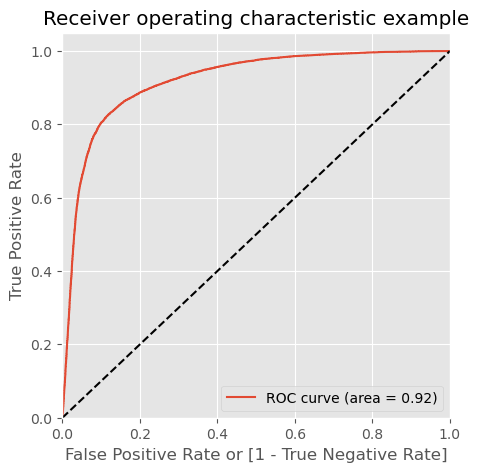

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_pred)

**Observation**

The area under the curve is 0.92.

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.852566,1,1,1,1,1,1,1,1,1,1,0
1,0,0.002512,0,1,0,0,0,0,0,0,0,0,0
2,0,0.524891,1,1,1,1,1,1,1,0,0,0,0
3,0,0.000530,0,1,0,0,0,0,0,0,0,0,0
4,0,0.011731,0,1,0,0,0,0,0,0,0,0,0


**Observations**

The above metric shows the probability of churns at different threshold

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.733972     0.976832     0.491112
0.2          0.2  0.782523     0.953558     0.611488
0.3          0.3  0.813004     0.928202     0.697806
0.4          0.4  0.833689     0.902738     0.764640
0.5          0.5  0.847862     0.873272     0.822452
0.6          0.6  0.853280     0.835371     0.871190
0.7          0.7  0.846154     0.779427     0.912881
0.8          0.8  0.808733     0.671435     0.946031
0.9          0.9  0.647067     0.312710     0.981423


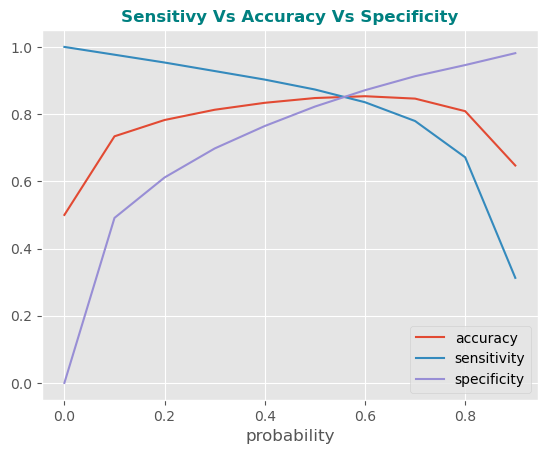

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.title("Sensitivy Vs Accuracy Vs Specificity",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.style.use("ggplot")
plt.show()

**Observation**

As per the above graph, the threshold is 0.55.

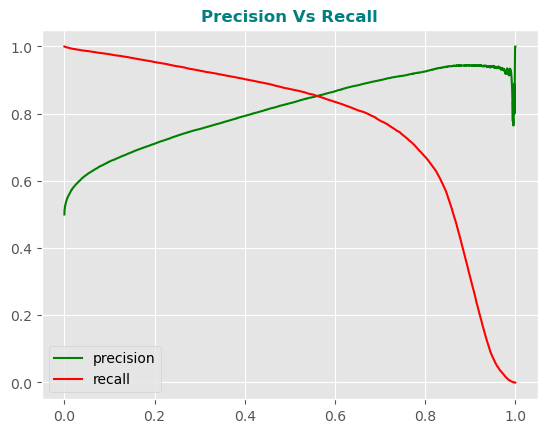

In [ ]:
#plotting Precision vs Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_pred)
plt.plot(thresholds, p[:-1], "g-",label = "precision")
plt.plot(thresholds, r[:-1], "r-",label = "recall")
plt.title("Precision Vs Recall",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.style.use("ggplot")
plt.legend()
plt.show()

**Observation**

As per the above graph, the threshold is 0.55

In [ ]:
# As per the Precision Vs Recall tradeover, the probability threshold is 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_pred.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,Churn,Churn_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.852566,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.002512,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.524891,1,1,1,1,1,1,1,0,0,0,0,0
3,0,0.000530,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.011731,0,1,0,0,0,0,0,0,0,0,0,0


**Observations**

As per the scroces seen in the above graph, lets run the prediction by keeping the 0.55 as threshold

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Calculating the accuracy score
Accuracy_score_train = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
print(f"Accuracy_score_train = {round(Accuracy_score_train,2)*100}%")
# Getting the Precision score
Precision_score_train = precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
print(f"Precision_score_train = {round(Precision_score_train,2)*100}%")
# Calculating the recall
Recall_score_train = recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
print(f"Recall_score_train = {round(Recall_score_train,2)*100}%")
# Calculating the ROC_AUC_SCORE
ROC_AUC_SCORE = roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_pred)
print(f"ROC_AUC_SCORE = {round(ROC_AUC_SCORE,2)*100}%")
# Calculating the f1-score
F1_score = metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(f"F1_score = {round(F1_score,2)*100}%")

Accuracy_score_train = 85.0%
Precision_score_train = 85.0%
Recall_score_train = 86.0%
ROC_AUC_SCORE = 92.0%
F1_score = 85.0%


In [ ]:
# Checking the X_test
X_test_lr = X_test[col]

In [ ]:
# Get the prediction of y_test
y_test_pred = res.predict(sm.add_constant(X_test_lr))

In [ ]:
#Dataframe for test predicted values
y_test_pred_final = pd.DataFrame({"Churn":y_test.values, "Churn_pred": y_test_pred})
y_test_pred_final.head()

,Churn,Churn_pred
88416,0,0.180265
5437,0,0.346111
89444,0,0.000895
41414,1,0.920229
28798,0,0.023127


In [ ]:
# Get the prediction for thresold 0.4
y_test_pred_final['predicted'] = y_test_pred_final.Churn_pred.map(lambda x: 1 if x > 0.55 else 0)

In [ ]:
# Calculating the accuracy score
Accuracy_score_train = accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(f"Accuracy_score_test = {round(Accuracy_score_train,2)*100}%")
# Calculating the recall
Recall_score_train = recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(f"Recall_score_test = {round(Recall_score_train,2)*100}%")
# Calculating the ROC_AUC_SCORE
ROC_AUC_SCORE = roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_pred)
print(f"ROC_AUC_SCORE_test = {round(ROC_AUC_SCORE,2)*100}%")

Accuracy_score_test = 85.0%
Recall_score_test = 76.0%
ROC_AUC_SCORE_test = 87.0%


**Observations**

The above scores are good

In [ ]:
# classification_report(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(f"Classification Report of Train Set : \n\n {classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted)}")
print("\n")
print(f"Classification Report of Test Set : \n\n {classification_report(y_test_pred_final.Churn, y_test_pred_final.predicted)}")

Classification Report of Train Set : 

               precision    recall  f1-score   support

           0       0.86      0.85      0.85     18733
           1       0.85      0.86      0.85     18733

    accuracy                           0.85     37466
   macro avg       0.85      0.85      0.85     37466
weighted avg       0.85      0.85      0.85     37466



Classification Report of Test Set : 

               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8029
           1       0.31      0.76      0.44       703

    accuracy                           0.85      8732
   macro avg       0.64      0.81      0.68      8732
weighted avg       0.92      0.85      0.87      8732



# Step 6: Decision Tree and Hyperparameter tuning

In [ ]:
#Importing the libraries for the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#checking the shape of the dataframe
print(X_resampled_smt.shape)
print(X_resampled_smt_dt.shape)

(37466, 42)
(37466, 103)


In [ ]:
#Initializing the model
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
params

{'max_depth': [5, 10, 15, 20],
 'min_samples_leaf': [5, 10, 20, 50, 100],
 'criterion': ['gini', 'entropy']}

In [ ]:
dt_grid_search = GridSearchCV(estimator=dt, param_grid=params, cv= 5, n_jobs=-1, verbose=1, scoring= "recall")

In [ ]:
dt_grid_search.fit(X_resampled_smt_dt, y_resampled_smt_dt)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
score_df = pd.DataFrame(dt_grid_search.cv_results_)
score_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.710730,0.038563,0.016519,0.001348,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.821457,0.888711,0.882840,0.892152,0.888681,0.874768,0.026823,36
1,1.694326,0.026696,0.013615,0.003248,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.821457,0.888711,0.882840,0.892152,0.888681,0.874768,0.026823,36
2,1.673761,0.043789,0.016594,0.002899,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.819589,0.887643,0.882573,0.890817,0.888681,0.873861,0.027271,38


In [ ]:
print(X_resampled_smt_dt.shape)
print(X_test.shape)

(37466, 103)
(8732, 103)


In [ ]:
dt_best = dt_grid_search.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)


In [ ]:
y_train_pred = dt_grid_search.best_estimator_.predict(X_resampled_smt_dt)

In [ ]:
recall_score(y_resampled_smt_dt,y_train_pred)

0.9703197565792986

In [ ]:
y_test_pred  = dt_grid_search.best_estimator_.predict(X_test)

In [ ]:
recall_score(y_test,y_test_pred)

0.6088193456614509

**Observations**

The GridSearch provided the best estimator but those were not as per our satisfication level inline with business problem.

Prepared new Decision tree model by tuning the hypermeters.

In [ ]:
dt_1 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5,min_samples_split = 5, random_state=100, criterion= "entropy")
dt_1.fit(X_resampled_smt_dt, y_resampled_smt_dt)
y_train_pred = dt_1.predict(X_resampled_smt_dt)
y_test_pred  = dt_1.predict(X_test)
print("Recall_train = ", recall_score(y_resampled_smt_dt,y_train_pred))
print("Accuracy_train = ", accuracy_score(y_resampled_smt_dt,y_train_pred))
print("Recall_test = ", recall_score(y_test,y_test_pred))
print("Accuracy_test = ", accuracy_score(y_test,y_test_pred))

Recall_train =  0.8841616398868307
Accuracy_train =  0.8425505791918005
Recall_test =  0.7709815078236131
Accuracy_test =  0.8011910215300045
Precision_train =  0.8162329982259018
Precision_test =  0.2560226735947095


**Observation**

There scores are approximately close to the results received in the logistic Regression.

# Step 7: Random Forest and Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Initializing the model
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators = 50,oob_score=True)
rf.fit(X_resampled_smt_rf,y_resampled_smt_rf)

RandomForestClassifier(max_depth=3, n_estimators=50, oob_score=True,
                       random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search
rf_params = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features' : [2,3,4],
    'n_estimators': [10,30,50,70,80, 90, 100,150]
}

In [ ]:
(rf_params)

{'max_depth': [1, 2, 3, 4, 5, 10, 15],
 'min_samples_leaf': [5, 10, 20, 50, 100],
 'max_features': [2, 3, 4],
 'n_estimators': [10, 30, 50, 70, 80, 90, 100, 150]}

In [ ]:
rf_gridsearch = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_gridsearch, param_grid= rf_params, cv = 5, verbose= True, scoring= "recall")

In [ ]:
%%time
grid_search_rf.fit(X_resampled_smt_rf,y_resampled_smt_rf)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
CPU times: total: 13min 58s
Wall time: 53min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 70, 80, 90, 100, 150]},
             scoring='recall', verbose=True)

In [ ]:
rf_best = grid_search_rf.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=15, max_features=4, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)


In [ ]:
y_train_pred_rf = rf_best.predict(X_resampled_smt_rf)
y_test_pred_rf = rf_best.predict(X_test)

In [ ]:
print("Recall_train = ", recall_score(y_resampled_smt_rf,y_train_pred_rf))
print("Accuracy_train = ", accuracy_score(y_resampled_smt_rf,y_train_pred_rf))
print("Precision_train = ", precision_score(y_resampled_smt_rf,y_train_pred_rf))
print("")
print("Recall_test = ", recall_score(y_test,y_test_pred_rf))
print("Accuracy_test = ", accuracy_score(y_test,y_test_pred_rf))
print("Precision_test = ", precision_score(y_test,y_test_pred_rf))

Recall_train =  0.9840922436342283
Accuracy_train =  0.9734425879464047
Precision_train =  0.9635688898181058

Recall_test =  0.6557610241820768
Accuracy_test =  0.9218964727439304
Precision_test =  0.51165371809101


**Observations**

The GridSearch provided the best estimator but those were not as per our satisfication level inline with business problem.

Prepared new Random Forest model by tuning the hypermeters.

In [ ]:
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1,
                             max_depth=3,
                             n_estimators = 5,
                             min_samples_leaf=3,
                             max_features=3,
                             oob_score=True)
rf1.fit(X_resampled_smt_rf, y_resampled_smt_rf)
y_train_pred_rf1 = rf1.predict(X_resampled_smt_rf)
y_test_pred_rf1  = rf1.predict(X_test)
print("Recall_train = ", recall_score(y_resampled_smt_rf,y_train_pred_rf1))
print("Accuracy_train = ", accuracy_score(y_resampled_smt_rf,y_train_pred_rf1))
print("")
print("Recall_test = ", recall_score(y_test,y_test_pred_rf1))
print("Accuracy_test = ", accuracy_score(y_test,y_test_pred_rf1))

Recall_train =  0.788768483424972
Accuracy_train =  0.8035552234025517
Precision_train =  0.8128059849276638

Recall_test =  0.7283072546230441
Accuracy_test =  0.8122995877233166
Precision_test =  0.2612244897959184


In [ ]:
imp_features_df = pd.DataFrame({"Features" : X_resampled_smt_rf.columns,"Imp" : rf1.feature_importances_})
imp_features_df.sort_values(by="Imp", ascending=False)

,Features,Imp
68,total_rech_num_8,0.135678
11,loc_og_t2f_mou_8,0.128098
38,loc_ic_t2t_mou_8,0.119472
72,av_rech_amt_data_8,0.107712
50,std_ic_t2m_mou_8,0.071887
77,vol_3g_mb_7,0.056816
2,arpu_8,0.051558
49,std_ic_t2m_mou_7,0.048475
53,std_ic_t2f_mou_8,0.045406
90,monthly_3g_8,0.039548


In [ ]:
final_imp_features = imp_features_df[imp_features_df["Imp"] > 0.02]
final_imp_features

,Features,Imp
2,arpu_8,0.051558
11,loc_og_t2f_mou_8,0.128098
38,loc_ic_t2t_mou_8,0.119472
49,std_ic_t2m_mou_7,0.048475
50,std_ic_t2m_mou_8,0.071887
53,std_ic_t2f_mou_8,0.045406
68,total_rech_num_8,0.135678
70,last_day_rch_amt_7,0.031951
72,av_rech_amt_data_8,0.107712
75,vol_2g_mb_8,0.038166


**Observations**

Using the Random Forest, the above are the important features we have for the model.

# Step 8: Conclusion and Recommendation

In [ ]:
# Conclusion
# Preparing the conclusion matrics with the model performance
conclusion_df = pd.DataFrame()

conclusion_df["Parameter"] = ["Accuracy_Train", "Recall_Train", "ROC_Curve_Score_Train",
                              "Accuracy_Test", "Recall_Test", "ROC_Curve_Score_Test"]
conclusion_df["PCA_Logistic Regression"] = ["84.5%", "87.03%", "--", "81.5%", "81.2%", "--"]
conclusion_df["Logistic Regression"] = ["85.0%", "86.0%", "92.0%",
                                       "85.0%", "76.0%", "87.0%"]
conclusion_df["Decision Tree"] = ["84.3%", "88.4%", "--","80.1%", "77.09%","--"]
conclusion_df["Random Forest"] = ["80.3%", "78.8%", "--","81.2%", "72.93%","--"]


In [ ]:
conclusion_df

,Parameter,Logistic Regression,Decision Tree,Random Forest
0,Accuracy_Train,85.0%,84.3%,80.3%
1,Recall_Train,86.0%,88.4%,78.8%
2,ROC_Curve_Score_Train,92.0%,--,--
3,Accuracy_Test,85.0%,80.1%,81.2%
4,Recall_Test,76.0%,77.09%,72.93%
5,ROC_Curve_Score_Test,87.0%,--,--


# Recommendations

### This Business problem requires more importance to identifying churner then the non-churner accurately. So we are evaluated models based on recall evaluation matrix. The dataframe prepred as above with logistic regression, Decision Tree and Random Forest.

### The PCA has been used on logistic regression to get the recall score which is approximatly same as individual algorithm recall score.

### The Random forest algorithm provided recall score 78.8% on train dataset and 72.93% on test dataset, the listed are the top10 features generated by the random forest algorithm which signifies the importance of finding the churners.

### It is reccommended to concentrate/focus and work upon below attributes to identify the churner as a business solution  

### Top 10 best features
- arpu_8
- loc_og_t2f_mou_8
- loc_ic_t2t_mou_8
- std_ic_t2m_mou_7
- std_ic_t2m_mou_8
- std_ic_t2f_mou_8
- total_rech_num_8
- last_day_rch_amt_7
- av_rech_amt_data_8
- vol_2g_mb_8
- vol_3g_mb_7
- monthly_2g_6
- monthly_3g_8